<a href="https://colab.research.google.com/github/ashishdhawas/Retail-Customer-Segmentation/blob/main/Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title :  Retail Customer Segmentation**

# Problem Description

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Data Description

**Attribute Information:**

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [2]:
import datetime
import scipy
import scipy.stats as stat

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Data loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [6]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [7]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [8]:
df.shape

(541909, 8)

The shape of the dataset is 541909 rows and 8 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Check Null Values**

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In the Description and CustomerID columns have null values so I decided to remove this null values

In [11]:
df.dropna(inplace=True)

**Check Duplicates**

In [12]:
df.duplicated().sum()

5225

In [13]:
# dropping ALL duplicte values
df.drop_duplicates(keep = False, inplace = True)

In [14]:
df.shape

(396767, 8)

After removing null values and duplicate values the new shape of the dataset is 396767 rows and 8 columns

In [15]:
df.describe()

Quantity      UnitPrice     CustomerID
count  396767.000000  396767.000000  396767.000000
mean       12.298913       3.487053   15275.108517
std       251.781170      70.187448    1714.401947
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13919.000000
50%         5.000000       1.950000   15132.000000
75%        12.000000       3.750000   16779.000000
max     80995.000000   38970.000000   18287.000000

In [16]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [17]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

# EDA

**Number of unique values in each columns**

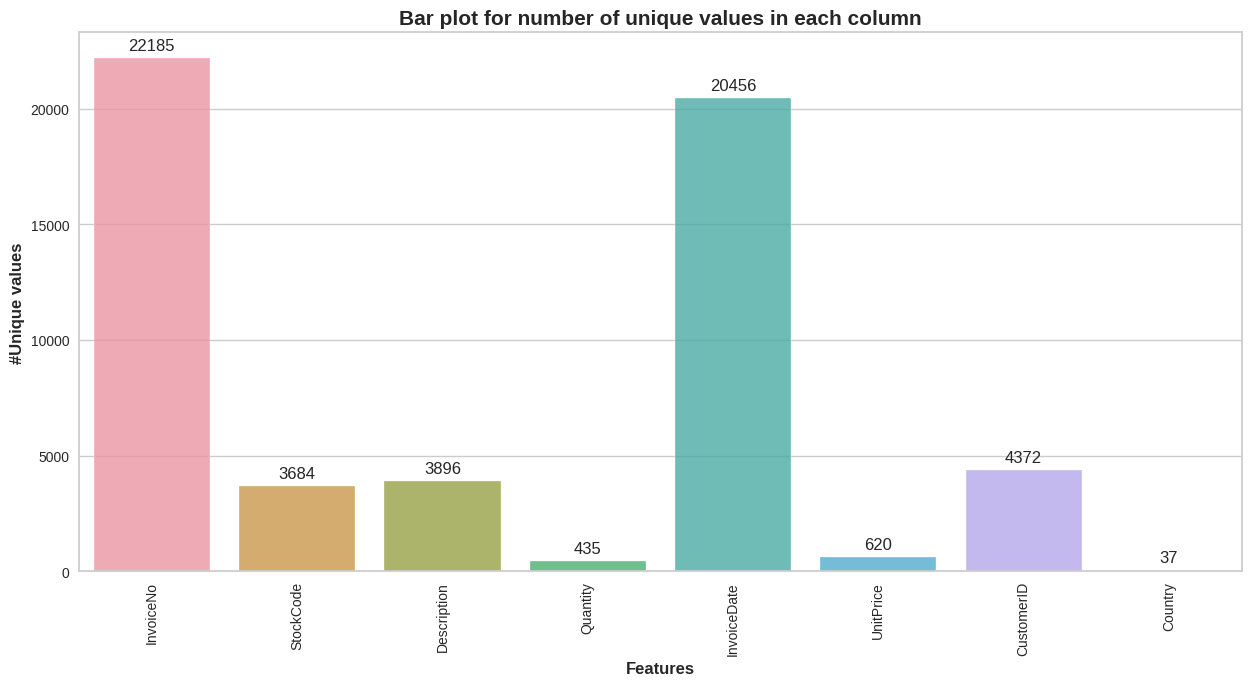

In [18]:
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Customer distribution in 1 year time period**

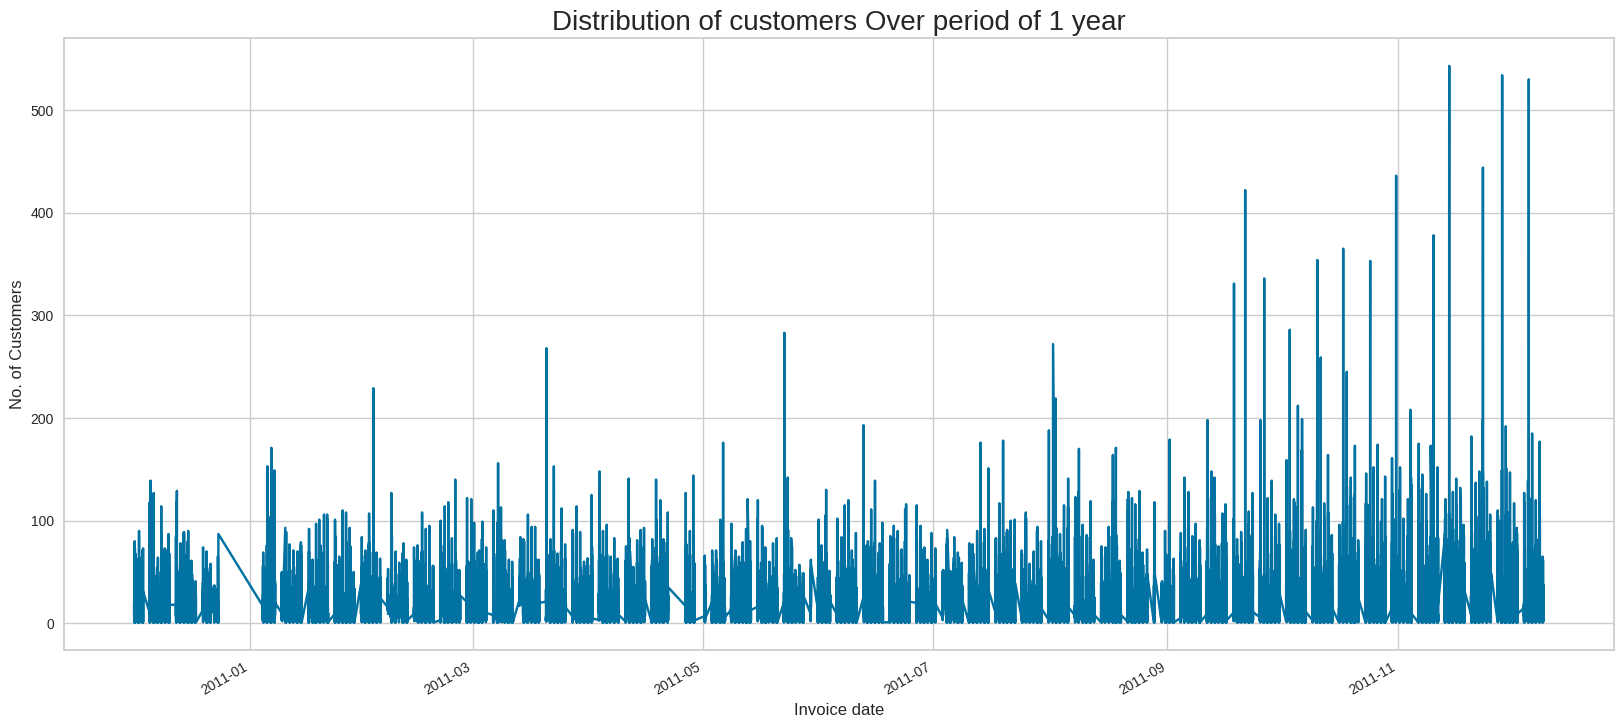

In [19]:
## customer distribution in 1 year time period
plt.figure(figsize=(20,9))
customer_distribution = df.groupby('InvoiceDate').count()['CustomerID'].plot()

## Set title and x, y labels
plt.title('Distribution of customers Over period of 1 year', size=20)
plt.xlabel('Invoice date', size=12)
plt.ylabel('No. of Customers', size=12)
plt.show()

**Country count on the basis of InvoceNo.**

In [20]:
## Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [21]:
country_count.head()

Country  InvoiceNo
0  Australia       1257
1    Austria        401
2    Bahrain         17
3    Belgium       2069
4     Brazil         32

In [22]:
## From country_count variable finding top 10 countries
Top_ten_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_ten_country

Country  InvoiceNo
0  United Kingdom     351964
1         Germany       9465
2          France       8459
3            EIRE       7465
4           Spain       2523
5     Netherlands       2371
6         Belgium       2069
7     Switzerland       1877
8        Portugal       1463
9       Australia       1257

In [23]:
## Adding country percentage column to top 10 countries data frame
Top_ten_country['Country_percent']= Top_ten_country['InvoiceNo']*100/df['InvoiceNo'].count()

**Plotting graph for top 10 countries**

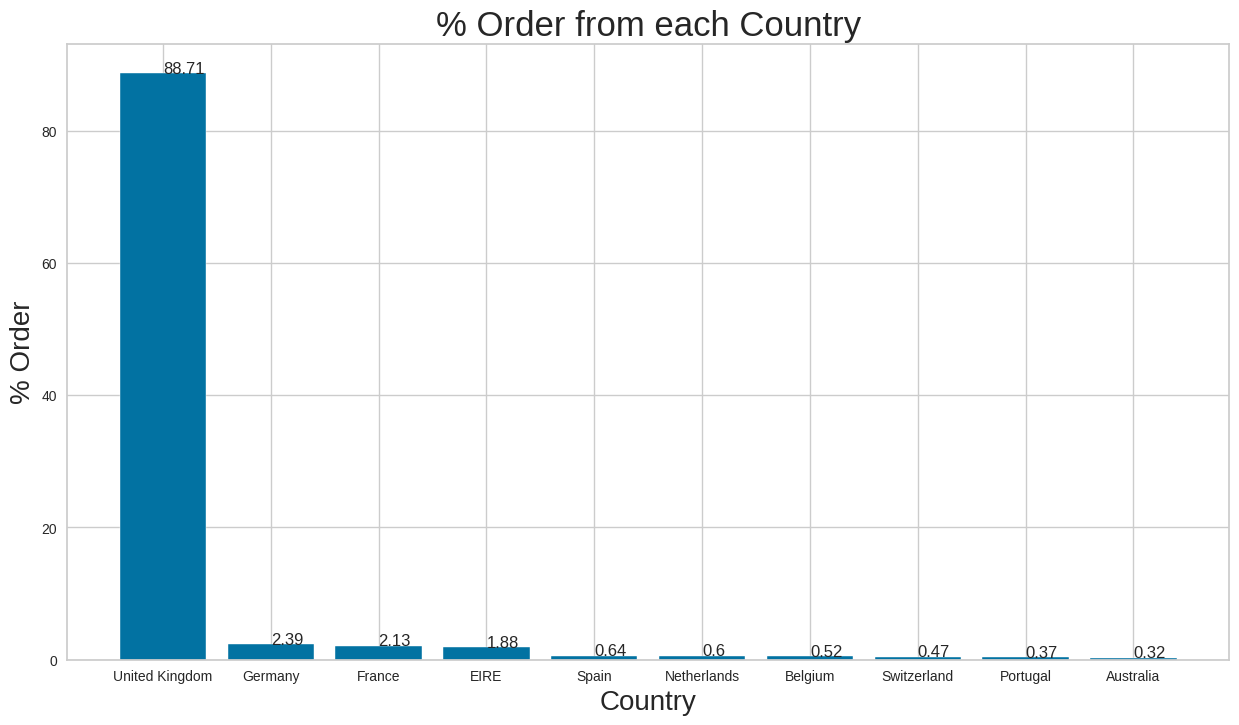

In [24]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_ten_country['Country']
y=Top_ten_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=25)

## Showing the plot
plt.show()

**Checking for cancelled orders**

Given in the description that InvoiceNo is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.  

Let us now look at the number of canceled orders in the data.

In [25]:
# String to be searched in start of string
search ="C"

# boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)

# displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom

In [26]:
cancel_order.shape

(8844, 8)

In [27]:
cancel_order_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_order_percentage

2.229016021997797

This shows that 8844 (approx 2.22%) were such orders which was cancelled.

In [28]:
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [29]:
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

Country  InvoiceNo
0  United Kingdom       7474
1         Germany        453
2            EIRE        247
3          France        147
4             USA        112
5       Australia         74
6           Spain         48
7           Italy         45
8         Belgium         38
9           Japan         37

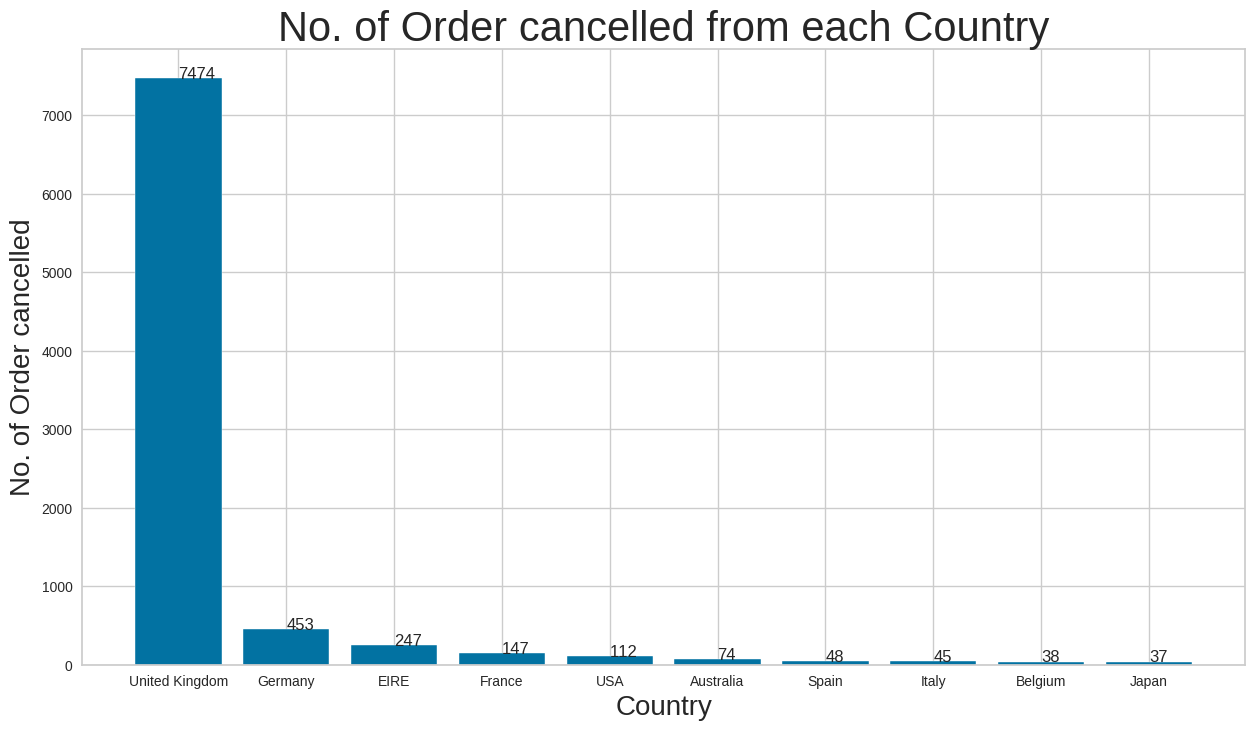

In [30]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

So I decided to ignore the cancelled order from the dataset

In [31]:
df = df[~df.InvoiceNo.str.contains("C", na=False)]

In [32]:
df.shape

(387923, 8)

# **Customer's data**

In [33]:
cs_df = df.copy()

In [34]:
cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice

Calculate the total amount for each customer and create the amount column in the dataset

In [35]:
cs_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  amount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34

In [36]:
#fig = plt.figure(figsize=(25, 7))
PercentSales = cs_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)

CustomerID     amount
0     14646.0  280206.02
1     18102.0  259657.30
2     17450.0  194230.79
3     16446.0  168472.50
4     14911.0  143597.28
5     12415.0  124914.53
6     14156.0  117040.53
7     17511.0   91062.38
8     16029.0   80676.84
9     12346.0   77183.60

<Axes: xlabel='CustomerID', ylabel='amount'>

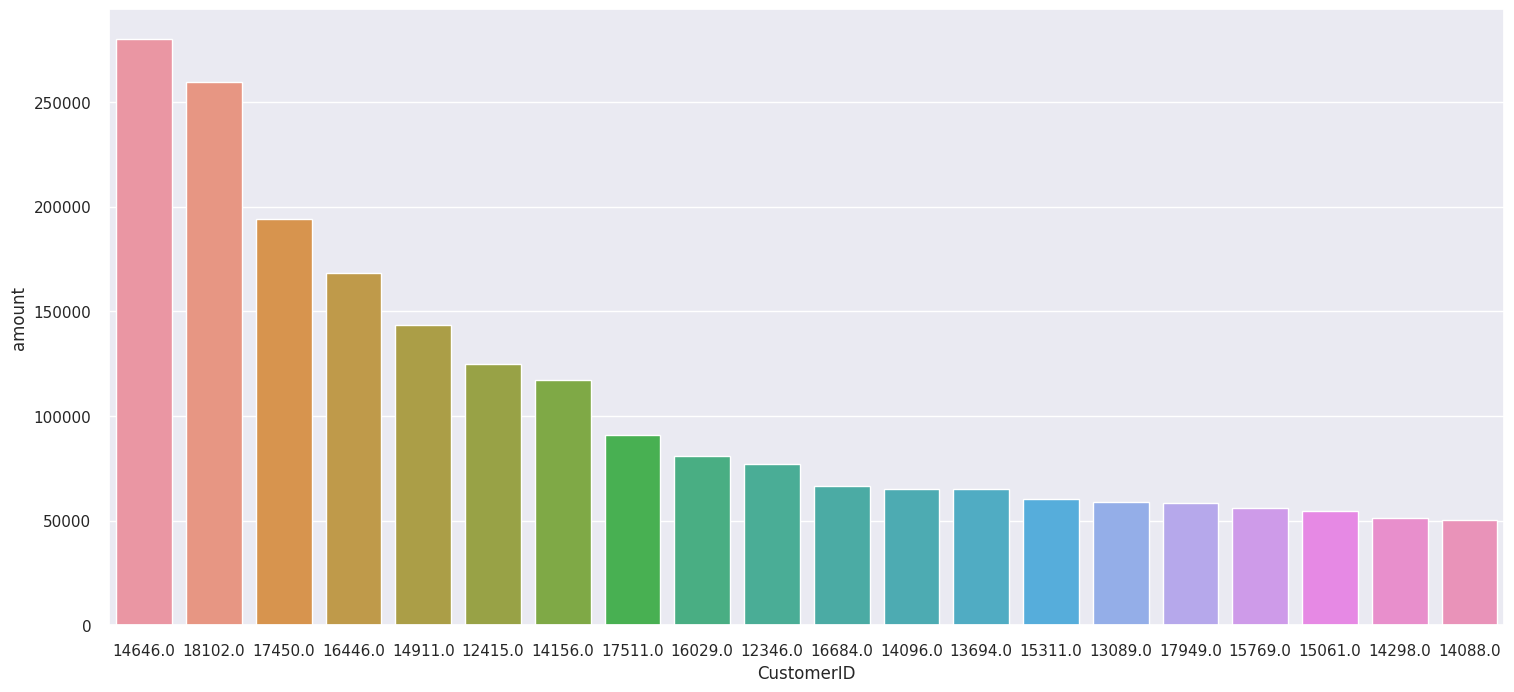

In [37]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="CustomerID", y="amount", data=PercentSales, order=PercentSales['CustomerID'])

# Top products

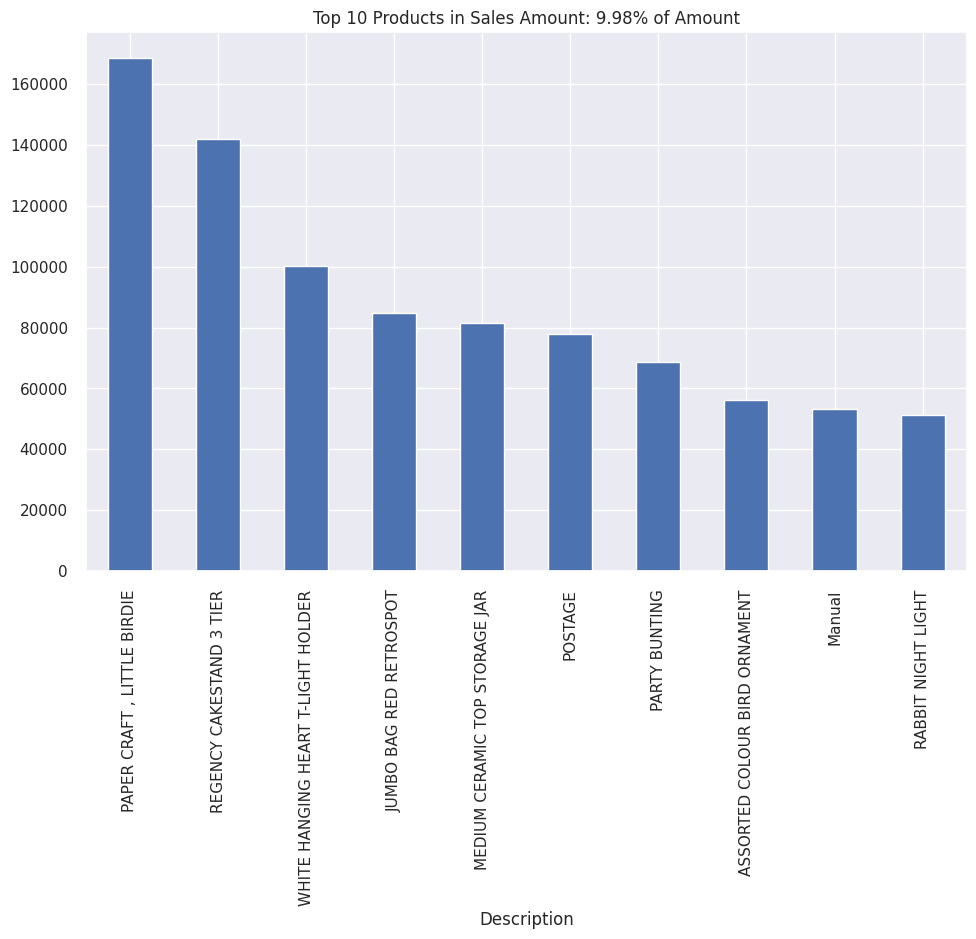

In [38]:
AmoutSum = cs_df.groupby(["Description"]).amount.sum().sort_values(ascending = False)
inv = cs_df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount'.\
                       format(PercentSales))

# Check the Distribution

<Axes: title={'center': 'distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

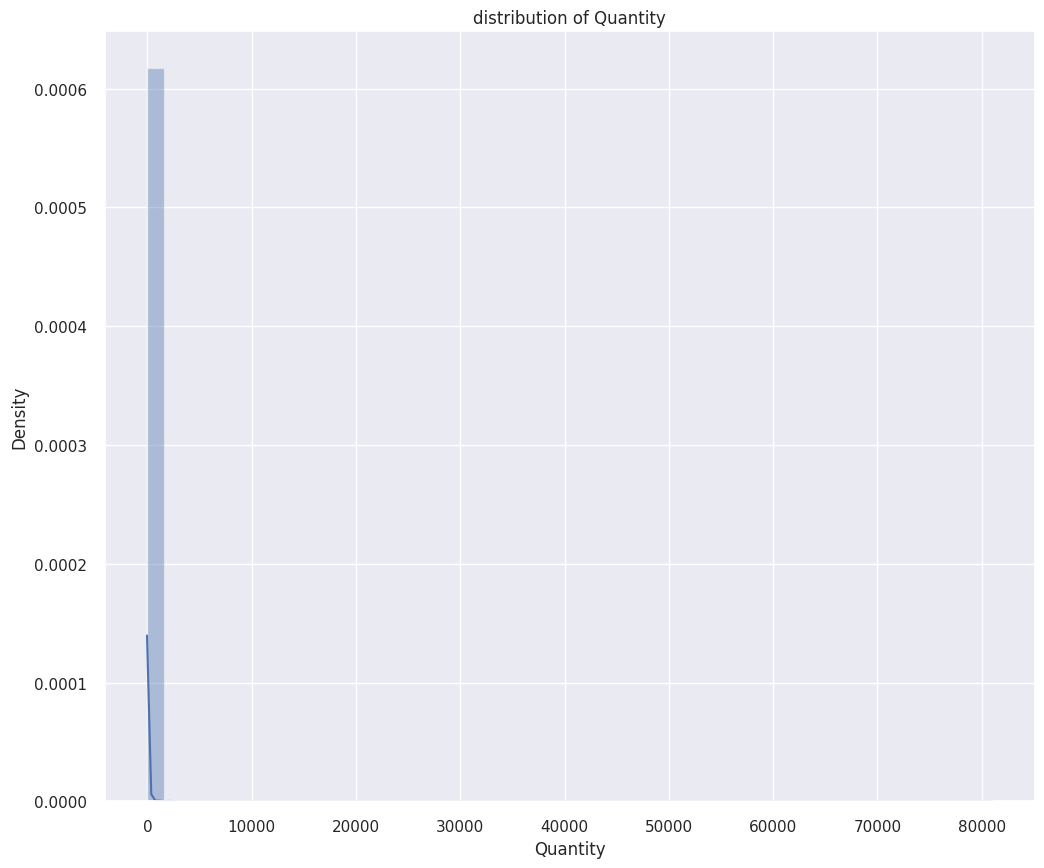

In [39]:
#distribution of Quantity
plt.figure(figsize=(12,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'])

<Axes: title={'center': 'log distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

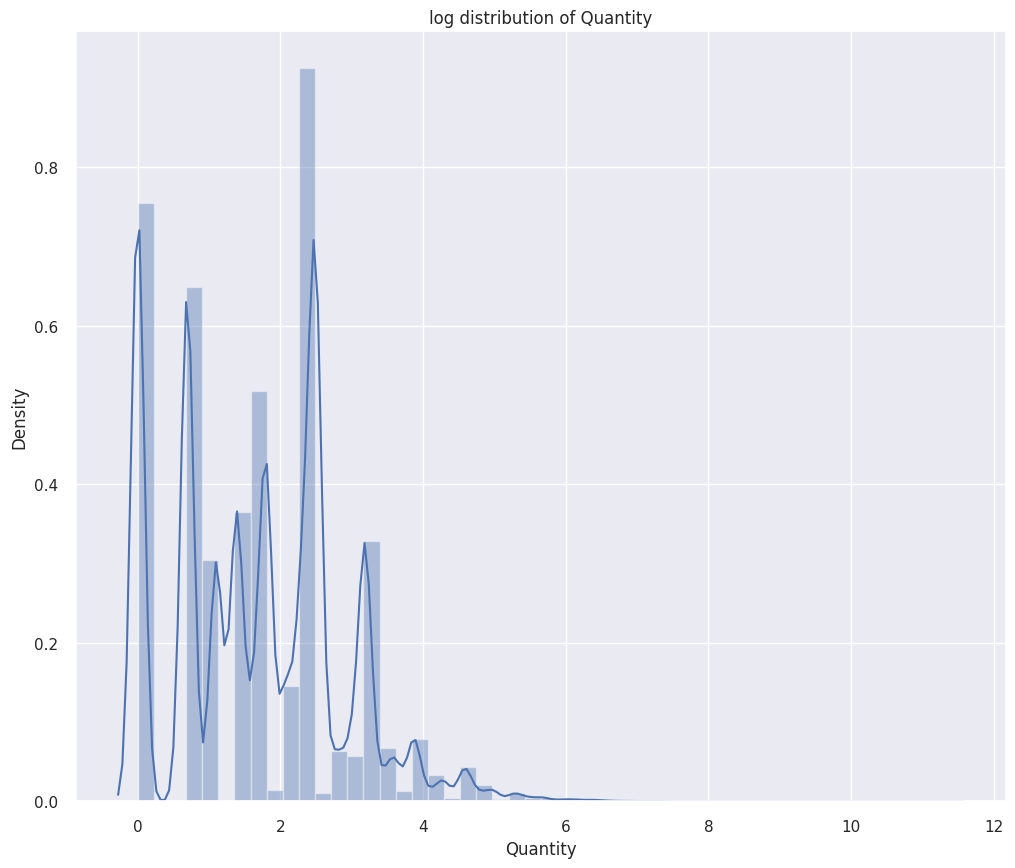

In [40]:
plt.figure(figsize=(12,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))

<Axes: title={'center': 'distribution of UnitPrice'}, xlabel='UnitPrice', ylabel='Density'>

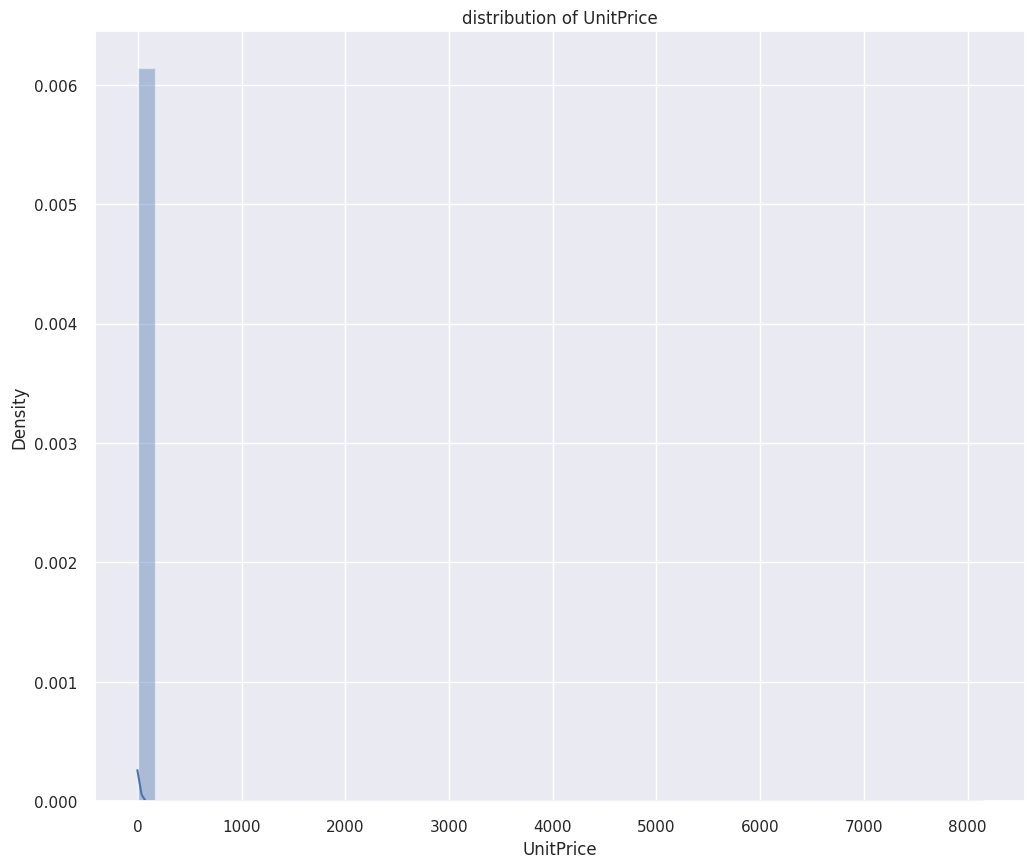

In [41]:
#distribution of UnitPrice
plt.figure(figsize=(12,10))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'])

In [42]:
df=df[df['UnitPrice']>0]

# Feature engineering

In [43]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

Convert InvoiceDate columns into date time formate

Create a new features from Invoicedate

In [44]:
df['Day']=df['InvoiceDate'].dt.day_name()
df['Month']=df['InvoiceDate'].dt.month_name()
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [45]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   

      Month  year  hour  minute  
0  December  2010     8      26  
1  December  2010     8      26  
2  December  2010     8      26  
3  December  2010     8      26  
4  December  2010     8      26

In [46]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

Create a new features TotalAmount form product of Quantity and Unitprice

<Axes: title={'center': 'distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

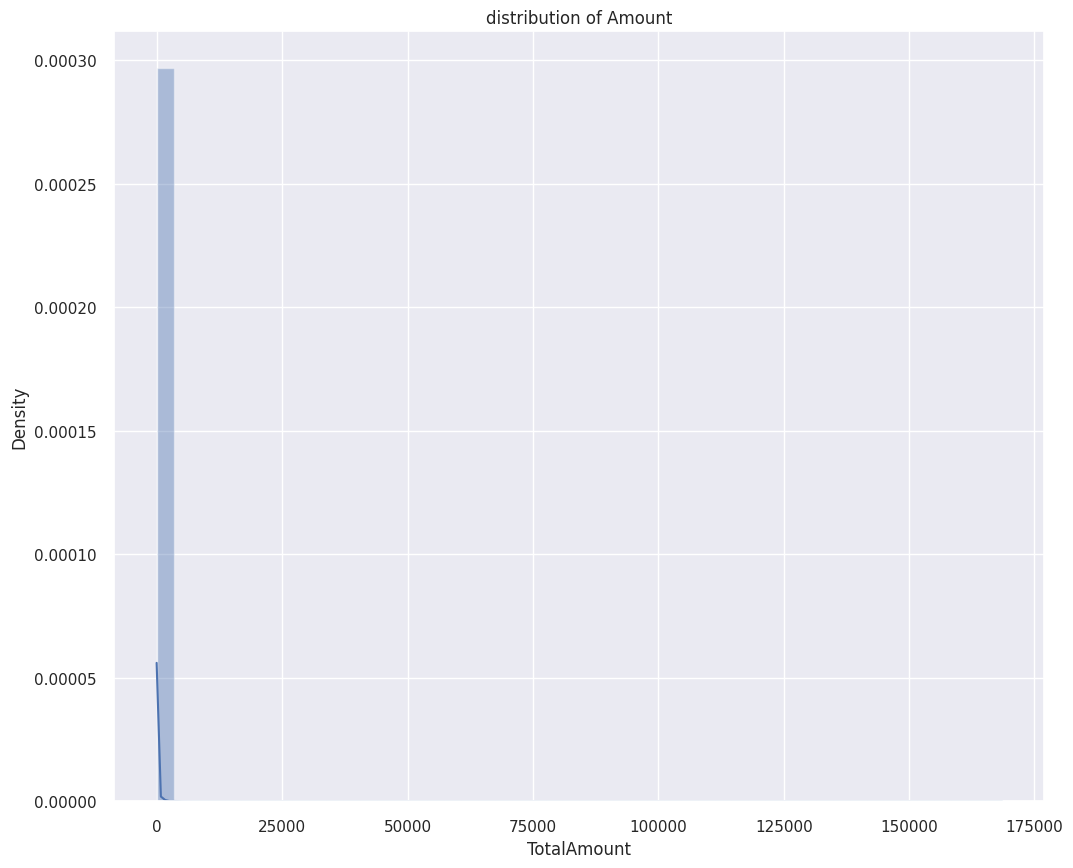

In [47]:
#distribution of TotalAmount
plt.figure(figsize=(12,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'])

In [48]:
df['TotalAmount'].describe()

count    387883.000000
mean         22.854229
std         313.013887
min           0.001000
25%           4.950000
50%          12.500000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

In [49]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  78497
1  Wednesday  67255
2    Tuesday  65069
3     Monday  63602
4     Sunday  59798
5     Friday  53662

<Axes: title={'center': 'Day'}, xlabel='Day_Name', ylabel='Count'>

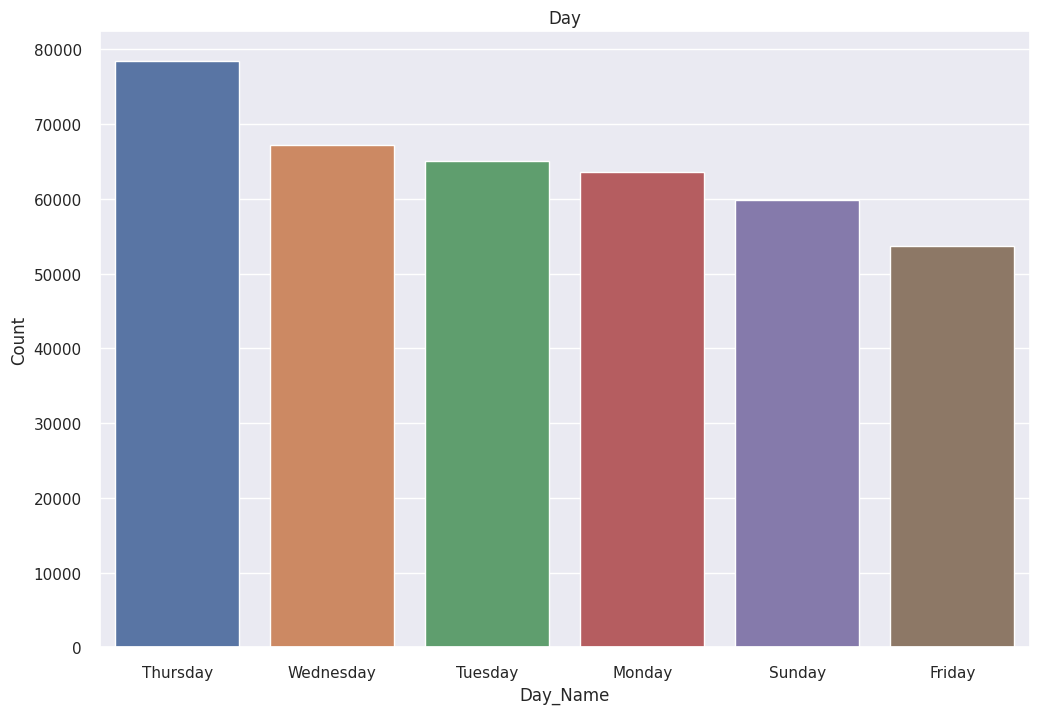

In [50]:
plt.figure(figsize=(12,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

Most of the customers have purches the items in Thursday ,Wednesday and Tuesday


In [51]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0    November  61900
1     October  48096
2    December  41996
3   September  39333
4         May  27838
5        June  26710
6       March  26590
7      August  26580
8        July  26342
9       April  22238
10    January  20766
11   February  19494

<Axes: title={'center': 'Month'}, xlabel='Month_Name', ylabel='Count'>

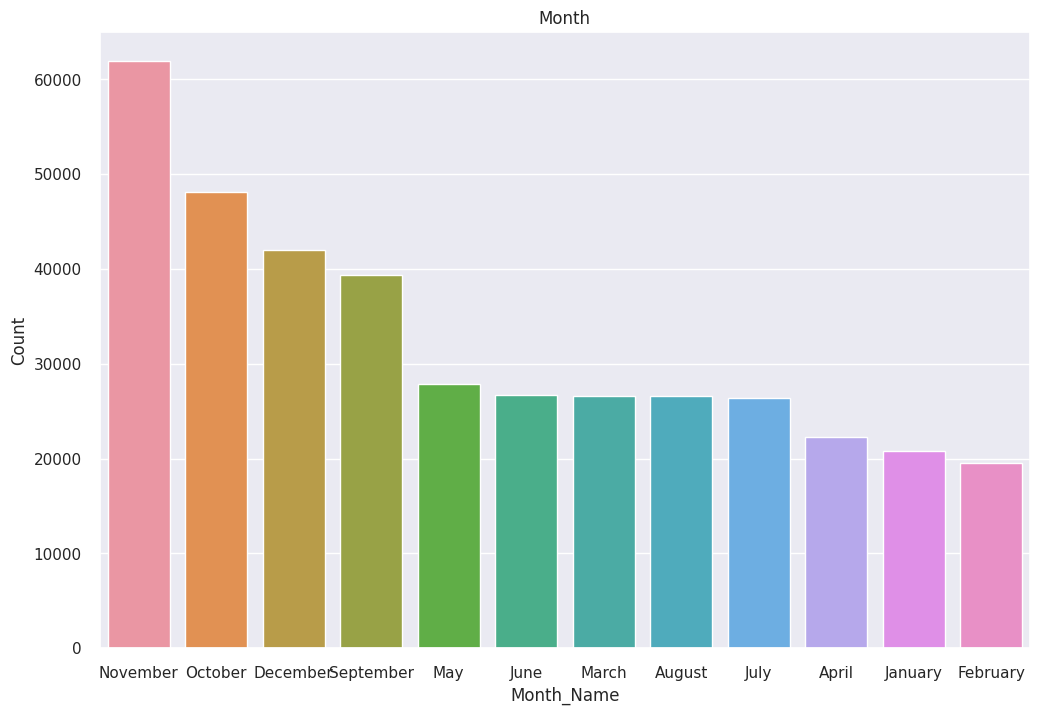

In [52]:
plt.figure(figsize=(12,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

most numbers of customers have purches the gifts in the month of November, October, December and September

less numbers of customers have purches the gifts in the month of April, january and February

In [53]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  69885
1          13  62076
2          14  52456
3          11  47710
4          15  44250
5          10  37567
6          16  23377
7           9  21911
8          17  12813
9           8   8684
10         19   3152
11         18   2866
12         20    756
13          7    379
14          6      1

<Axes: title={'center': 'Hour'}, xlabel='Hour_Name', ylabel='Count'>

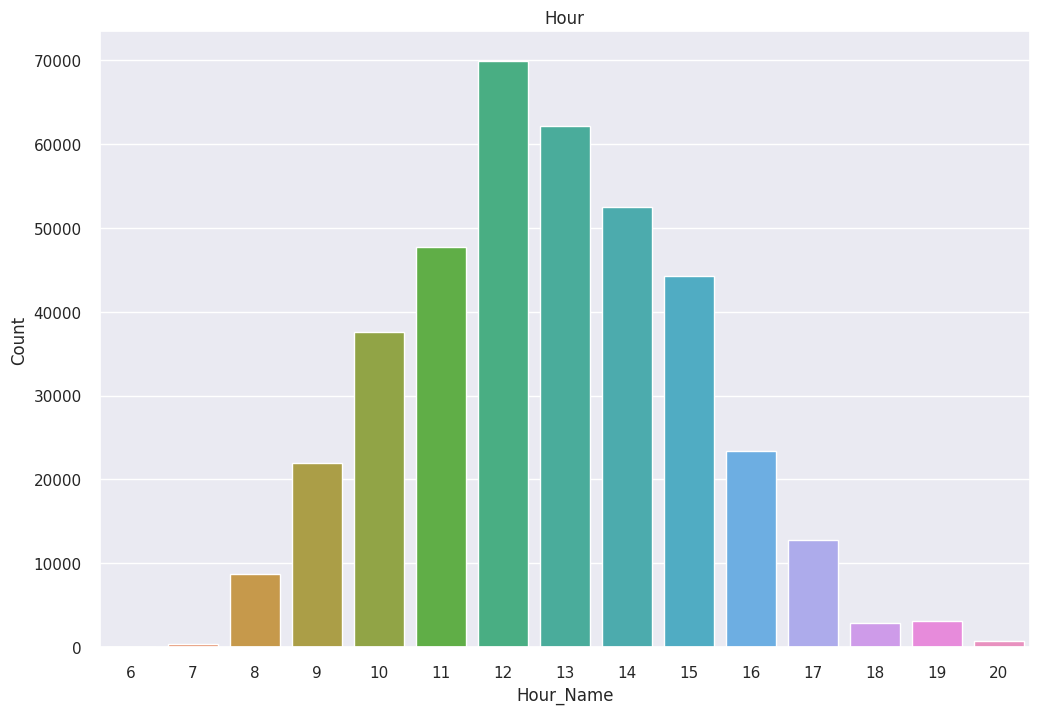

In [54]:
plt.figure(figsize=(12,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

From this graph we can see that in AfterNone Time most of the customers have purches the item.

In [55]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [56]:
df['Time_type']=df['hour'].apply(time_type)

<Axes: title={'center': 'Time_type'}, xlabel='Time_type', ylabel='count'>

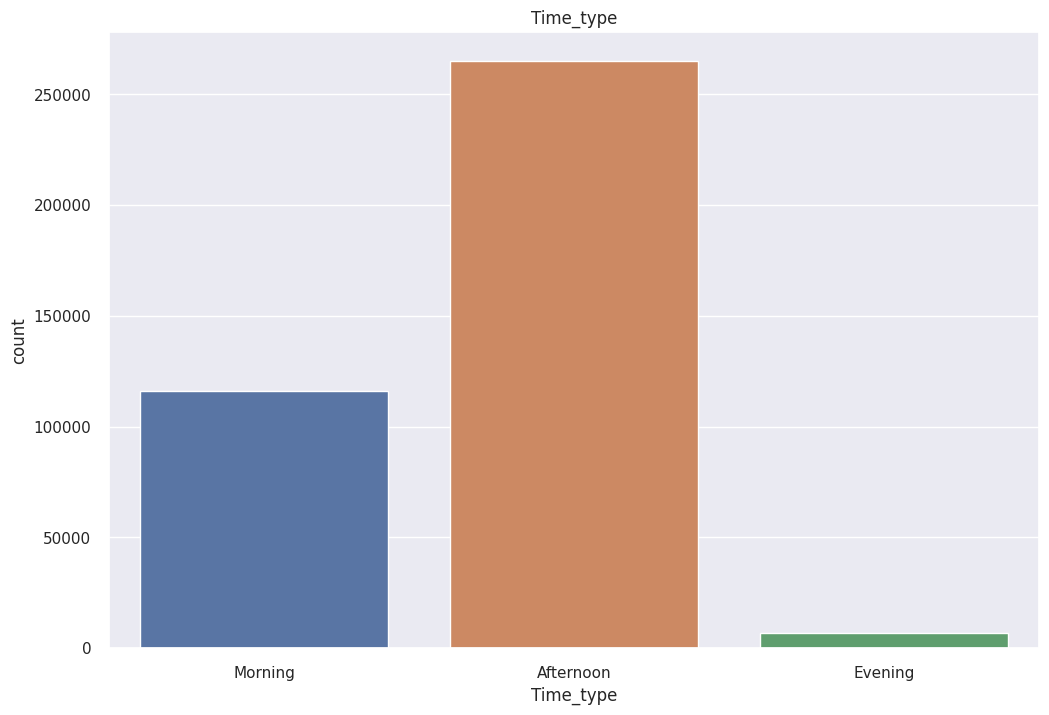

In [57]:
plt.figure(figsize=(12,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening

# Create the RFM model (Recency, Frequency,Monetary value)

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

Recency: How much days back customer visited the store

Frequency: How often a customer makes a purchase.

Monetary Value: How much money a customer spends on

In [58]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [59]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [60]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

<Axes: xlabel='Recency', ylabel='Density'>

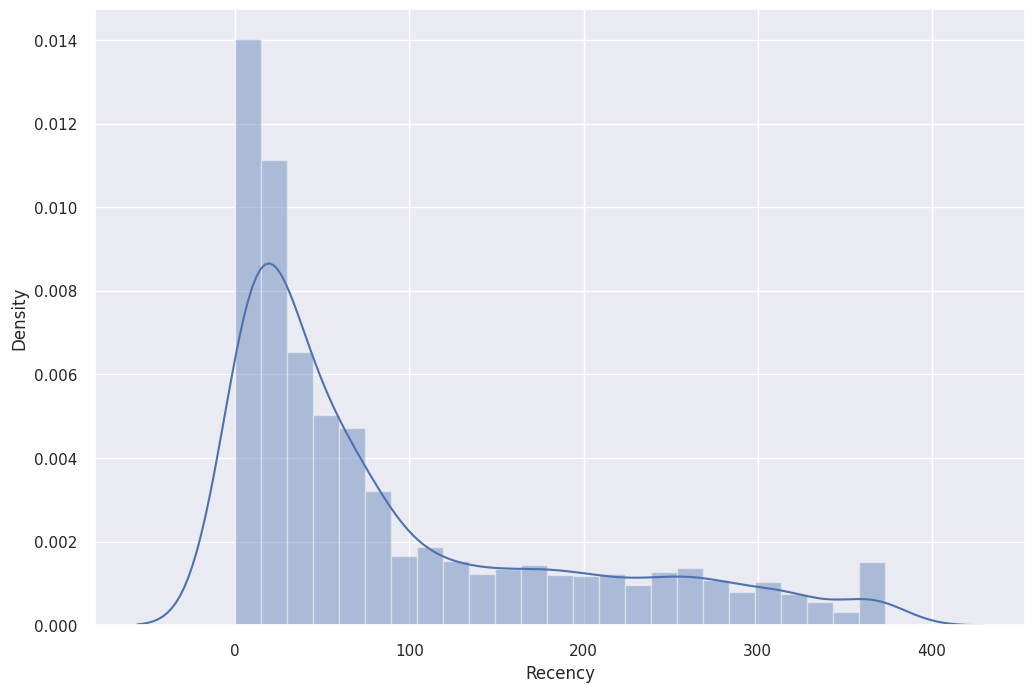

In [61]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(12,8))
sns.distplot(x)

In [62]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4338.000000
mean       89.415168
std       222.565945
min         1.000000
25%        17.000000
50%        40.000000
75%        97.000000
max      7523.000000
Name: Frequency, dtype: float64

<Axes: xlabel='Frequency', ylabel='Density'>

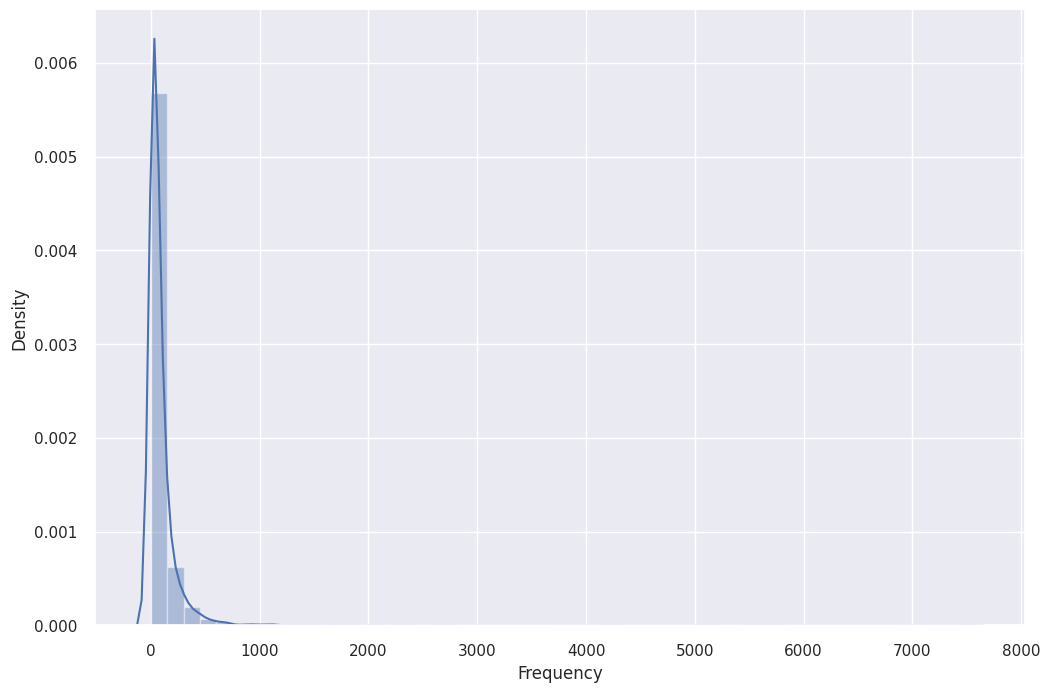

In [63]:
#Frequency distribution plot
x = rfm_df['Frequency']
plt.figure(figsize=(12,8))
sns.distplot(x)

In [64]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4338.000000
mean       2043.514766
std        8981.528470
min           3.750000
25%         305.280000
50%         664.130000
75%        1650.647500
max      280206.020000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

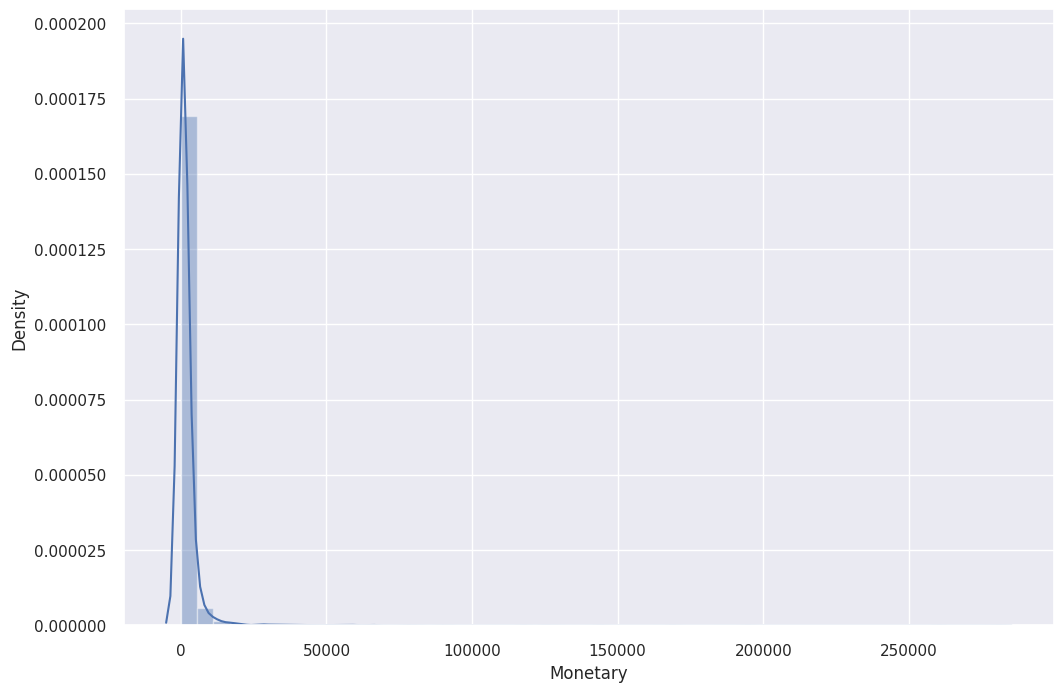

In [65]:
#Monateray distribution plot
x = rfm_df['Monetary']
plt.figure(figsize=(12,8))
sns.distplot(x)

# Split into four segments using quantiles

In [66]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [67]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 97.0},
 'Monetary': {0.25: 305.28, 0.5: 664.13, 0.75: 1650.6475}}

In [68]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [69]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [70]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

In [71]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

<Axes: xlabel='Recency', ylabel='Density'>

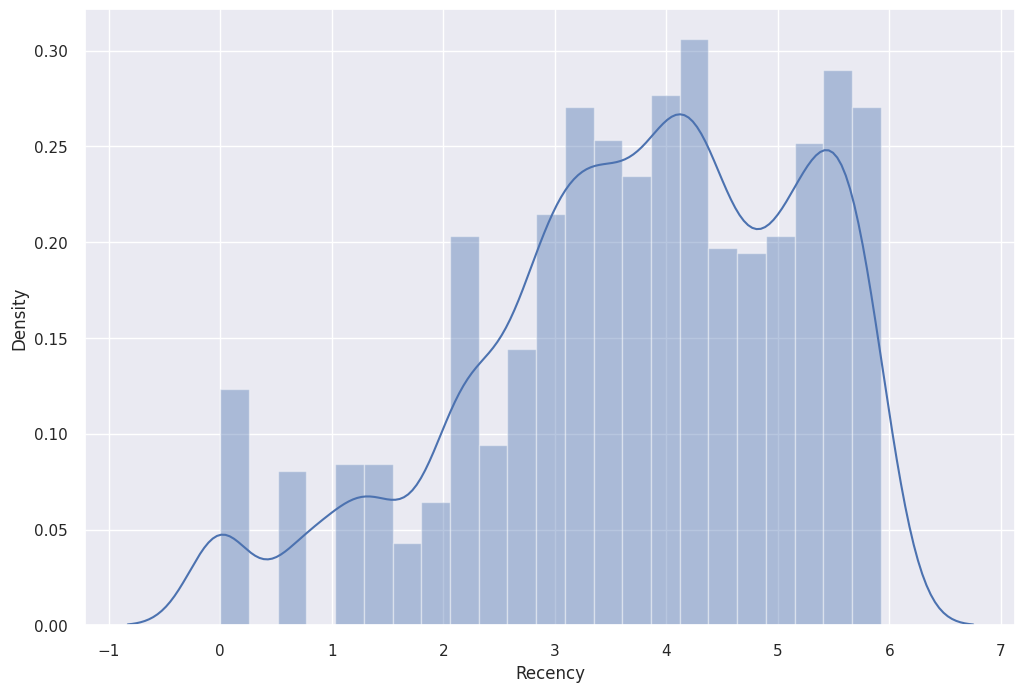

In [72]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(12,8))
sns.distplot(Recency_Plot)

<Axes: xlabel='Frequency', ylabel='Density'>

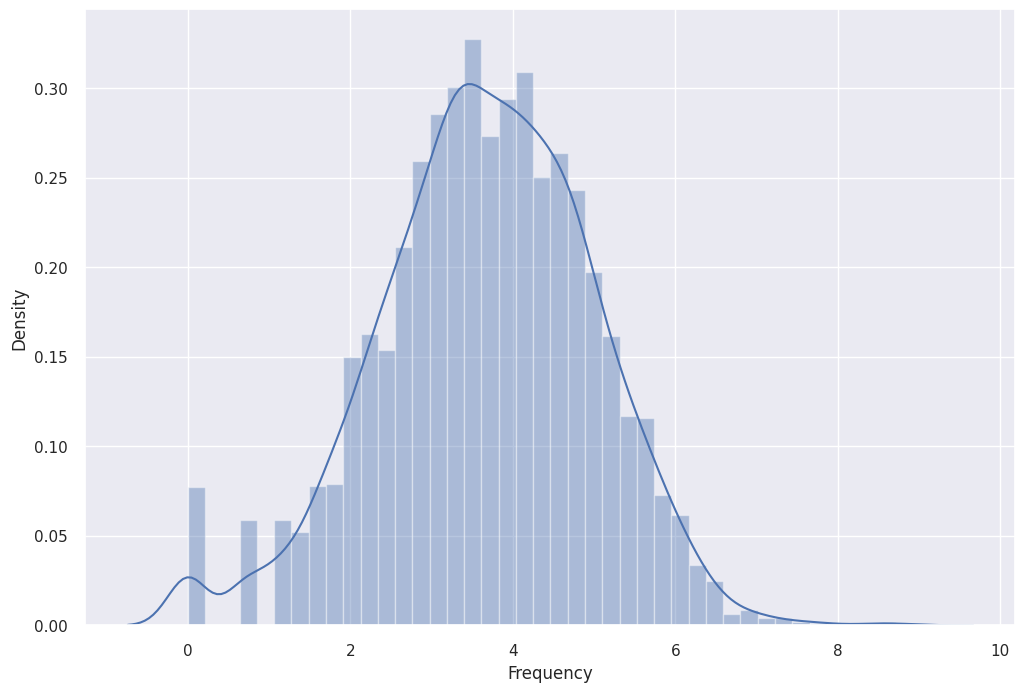

In [73]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(12,8))
sns.distplot(Frequency_Plot)

<Axes: xlabel='Monetary', ylabel='Density'>

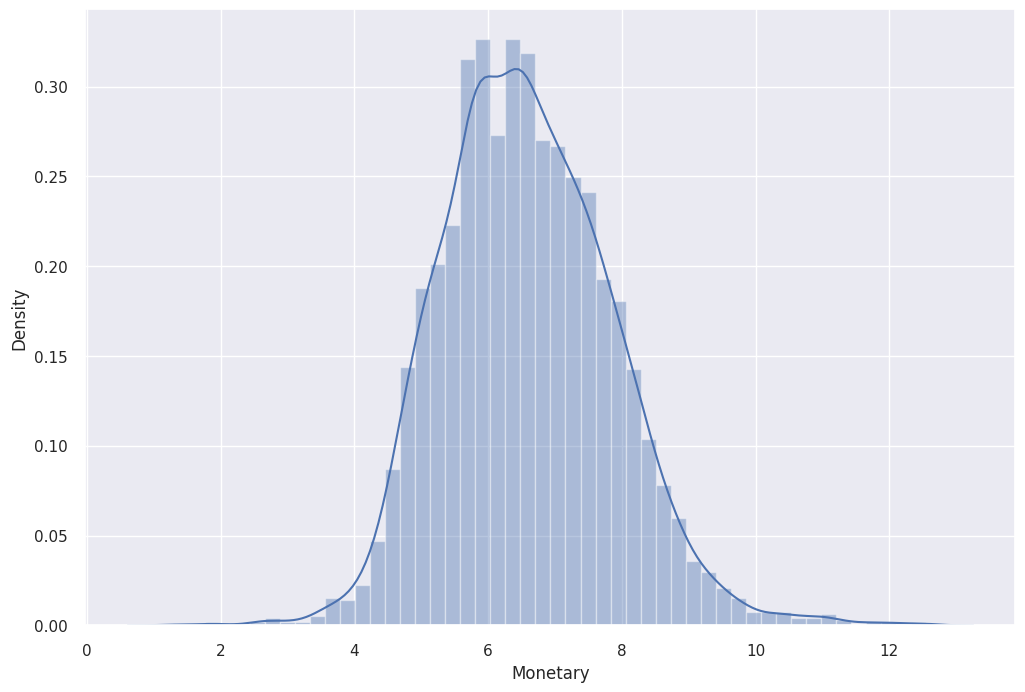

In [74]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(12,8))
sns.distplot(Monetary_Plot)

In [76]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

# K-Means Clustering

**Silhouette analysis on K-Means Clustering**

Silhouette analysis can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Let's see below how our data perform for each K clusters groups (3, 5 and 7) in the silhouette score of each cluster, along with the center of each of the cluster discovered in the scatter plots, by amount_log vs recency_log and vs frequency_log.

**Silhouette Analysis**

**silhouette score** = (p-q)/max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

**Applying Silhouette Score Method on Recency and Monetary**

In [77]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4204105430324845
For n_clusters = 3, silhouette score is 0.3422977761993943
For n_clusters = 4, silhouette score is 0.36522239104623483
For n_clusters = 5, silhouette score is 0.3368469144507806
For n_clusters = 6, silhouette score is 0.34434612119447994
For n_clusters = 7, silhouette score is 0.3477302612913184
For n_clusters = 8, silhouette score is 0.33995127677909326
For n_clusters = 9, silhouette score is 0.346254397961071
For n_clusters = 10, silhouette score is 0.34706418827497715
For n_clusters = 11, silhouette score is 0.337430540566469
For n_clusters = 12, silhouette score is 0.34130997223776544
For n_clusters = 13, silhouette score is 0.3406607648768488
For n_clusters = 14, silhouette score is 0.3424711015985782
For n_clusters = 15, silhouette score is 0.33652418068893725


**The Elbow Method**

Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

**Applying Elbow Method on Recency and Monetary**

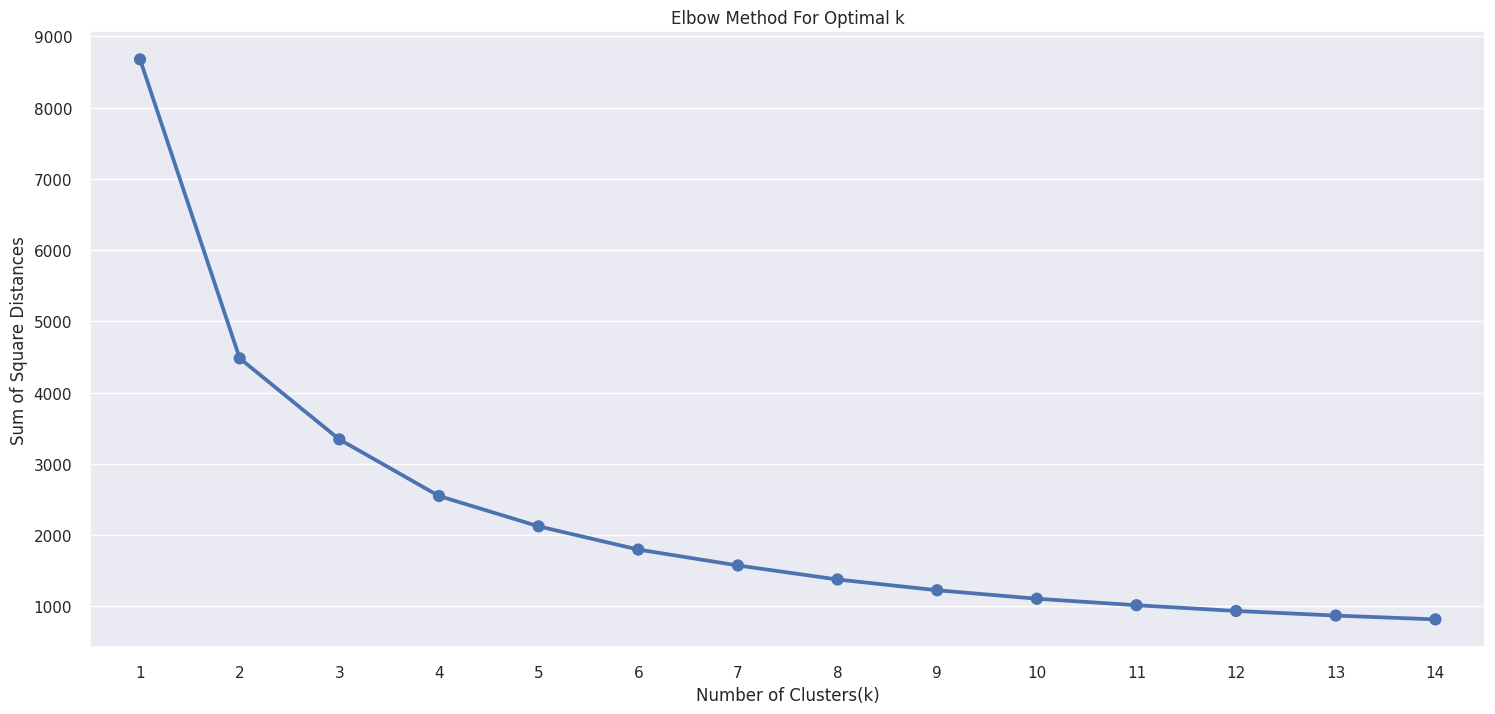

In [78]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

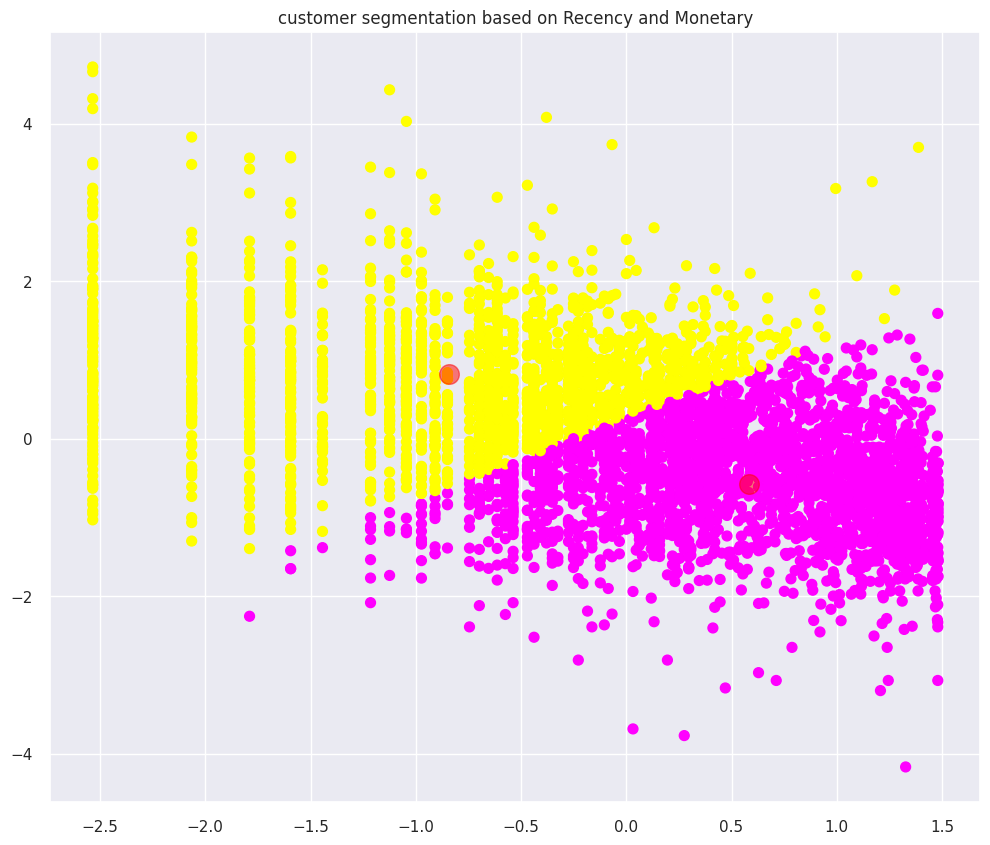

In [82]:
plt.figure(figsize=(12,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

we see that ,Customers are well separate when we cluster them by Recency and Monetary

# Applying DBSCAN on Recency and Monetary

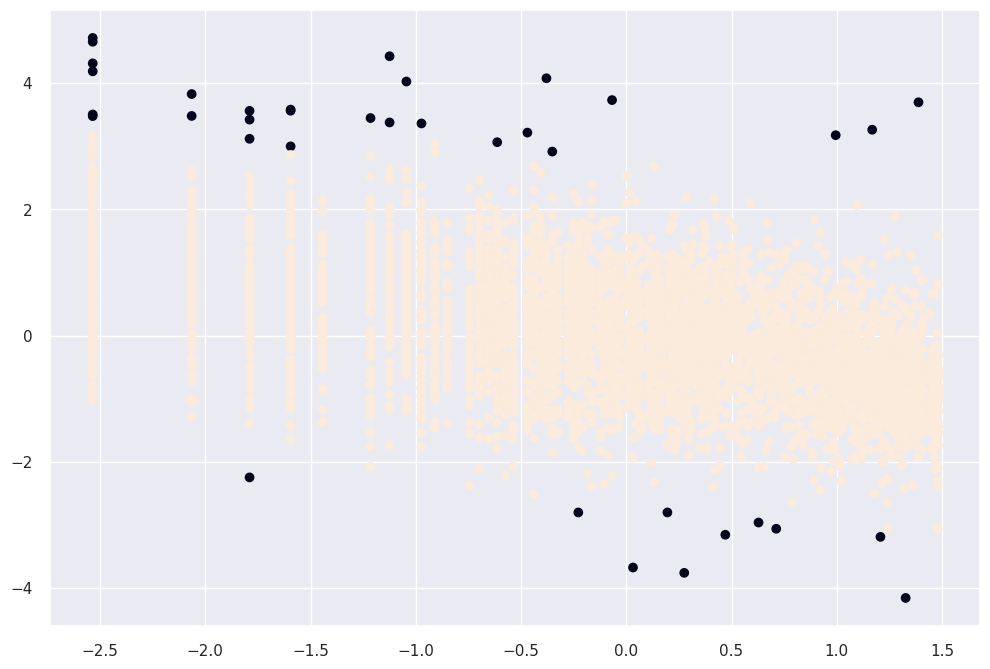

In [84]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Applying silhouette Score Method on Frquency and Monetary

In [85]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4788548558000375
For n_clusters = 3, silhouette score is 0.408415552960413
For n_clusters = 4, silhouette score is 0.37206359692158564
For n_clusters = 5, silhouette score is 0.348200363485265
For n_clusters = 6, silhouette score is 0.364004635938779
For n_clusters = 7, silhouette score is 0.3456737429282543
For n_clusters = 8, silhouette score is 0.33244743397771626
For n_clusters = 9, silhouette score is 0.34588088769192216
For n_clusters = 10, silhouette score is 0.3574805033609943
For n_clusters = 11, silhouette score is 0.3666267904742032
For n_clusters = 12, silhouette score is 0.3541992806776883
For n_clusters = 13, silhouette score is 0.36304771312064055
For n_clusters = 14, silhouette score is 0.35544667404951585
For n_clusters = 15, silhouette score is 0.36448700370368103


# Applying Elbow Method on Frequency and Monetary

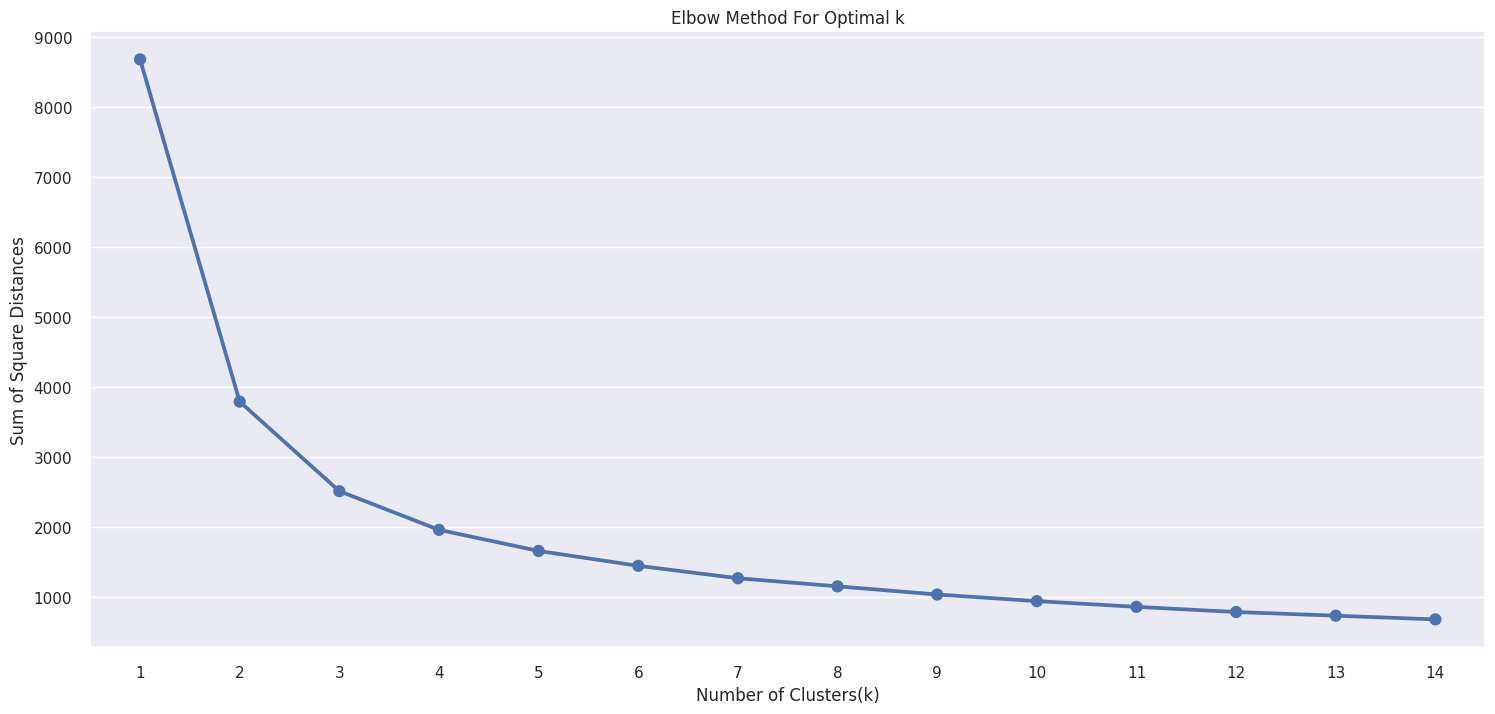

In [86]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [87]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

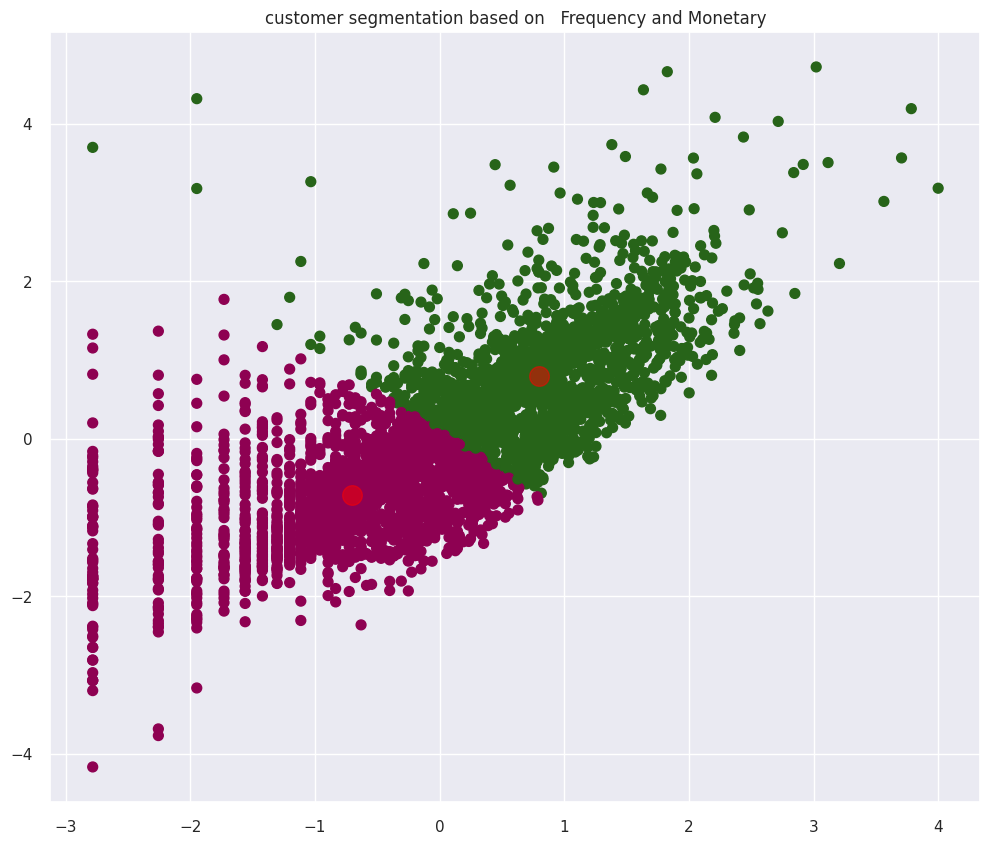

In [88]:
plt.figure(figsize=(12,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

we see that ,Customers are well separate when we cluster them by Frequency and Monetary

# Applying DBSCAN Method on Frquency and Monetary

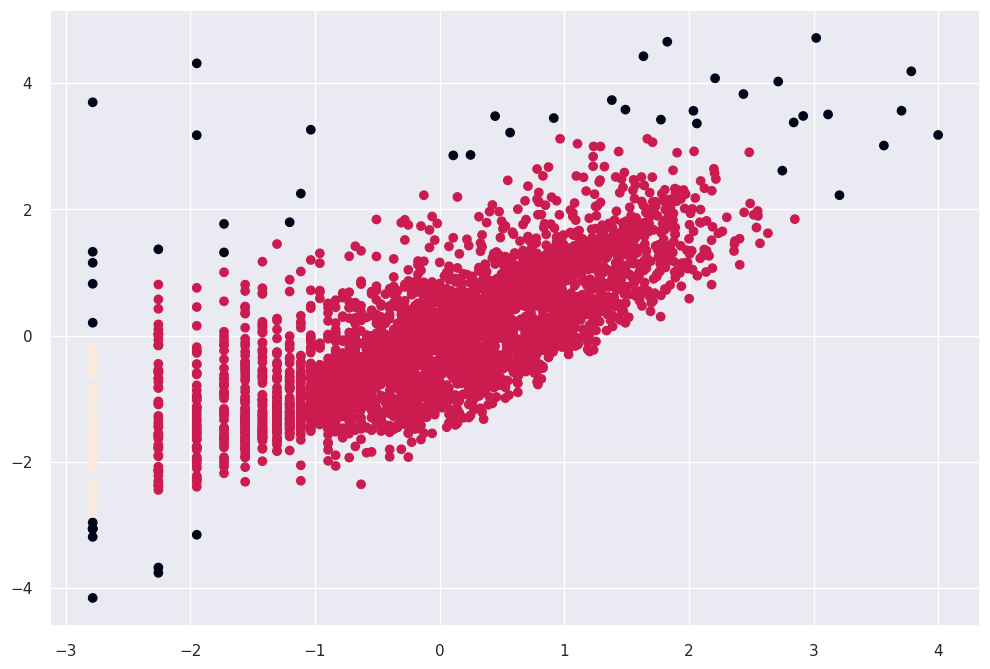

In [89]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

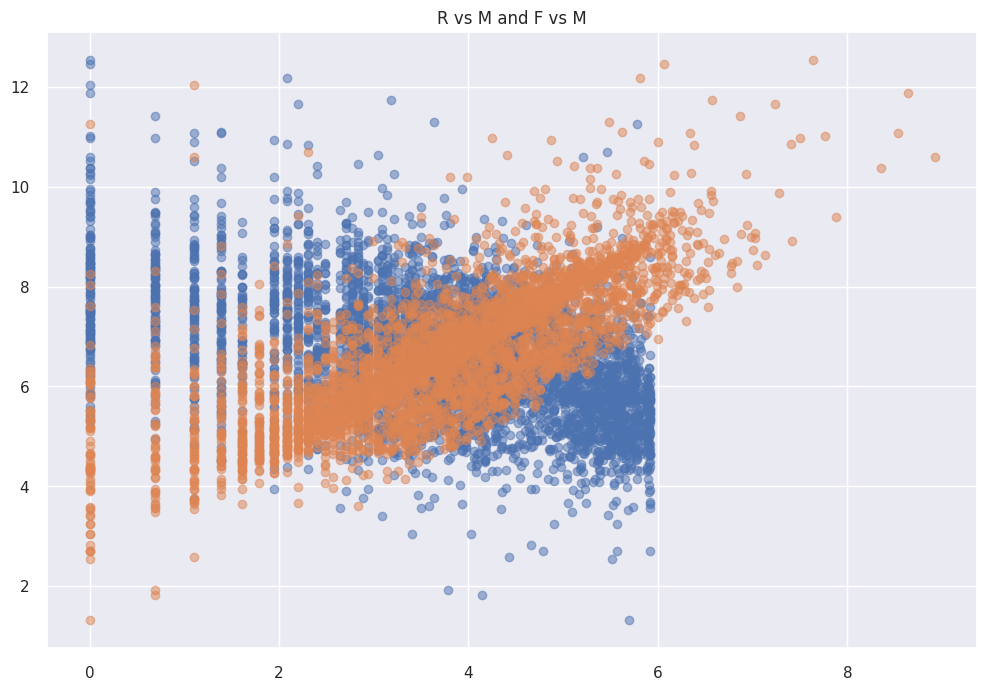

In [90]:
plt.figure(figsize=(12,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

# 3D visualization of Recency ,Frequency and Monetary

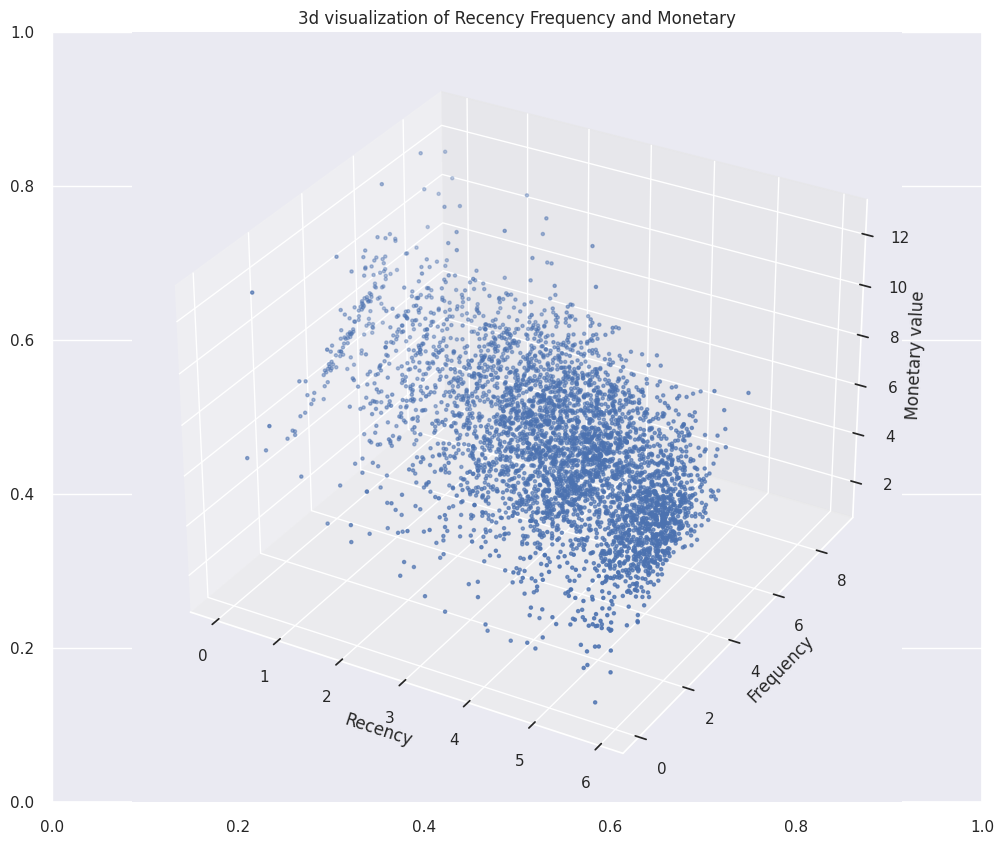

In [91]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(12,10))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

# Applying Silhouette Method on Recency ,Frequency and Monetary

In [92]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.39580979718087433
For n_clusters = 3 The average silhouette_score is : 0.30378334148960423
For n_clusters = 4 The average silhouette_score is : 0.30139690447848766
For n_clusters = 5 The average silhouette_score is : 0.2794063735439943
For n_clusters = 6 The average silhouette_score is : 0.27944919283996095
For n_clusters = 7 The average silhouette_score is : 0.2647163560989048
For n_clusters = 8 The average silhouette_score is : 0.2628223592334205
For n_clusters = 9 The average silhouette_score is : 0.2530411581599932
For n_clusters = 10 The average silhouette_score is : 0.2619154313903778
For n_clusters = 11 The average silhouette_score is : 0.2622651507328627
For n_clusters = 12 The average silhouette_score is : 0.261718012893974
For n_clusters = 13 The average silhouette_score is : 0.26397970860981407
For n_clusters = 14 The average silhouette_score is : 0.26354451210734736
For n_clusters = 15 The average silhouette_score is : 

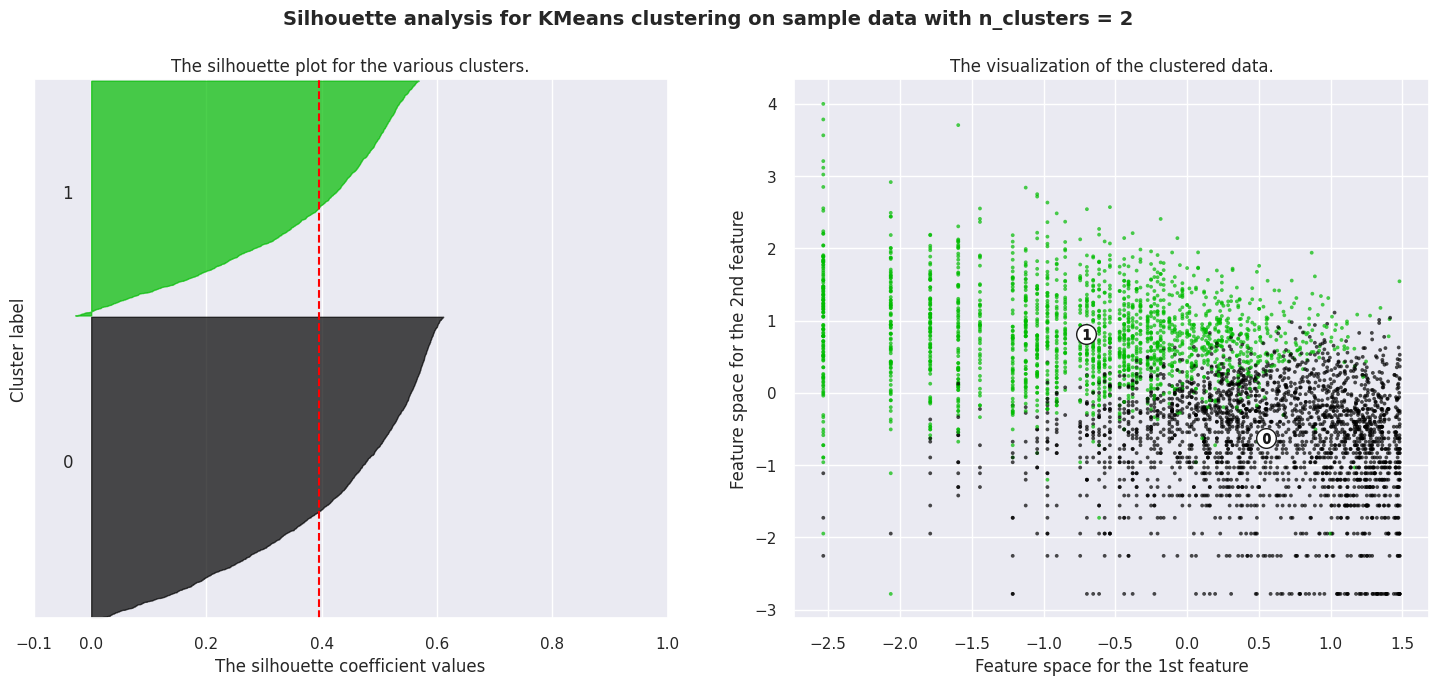

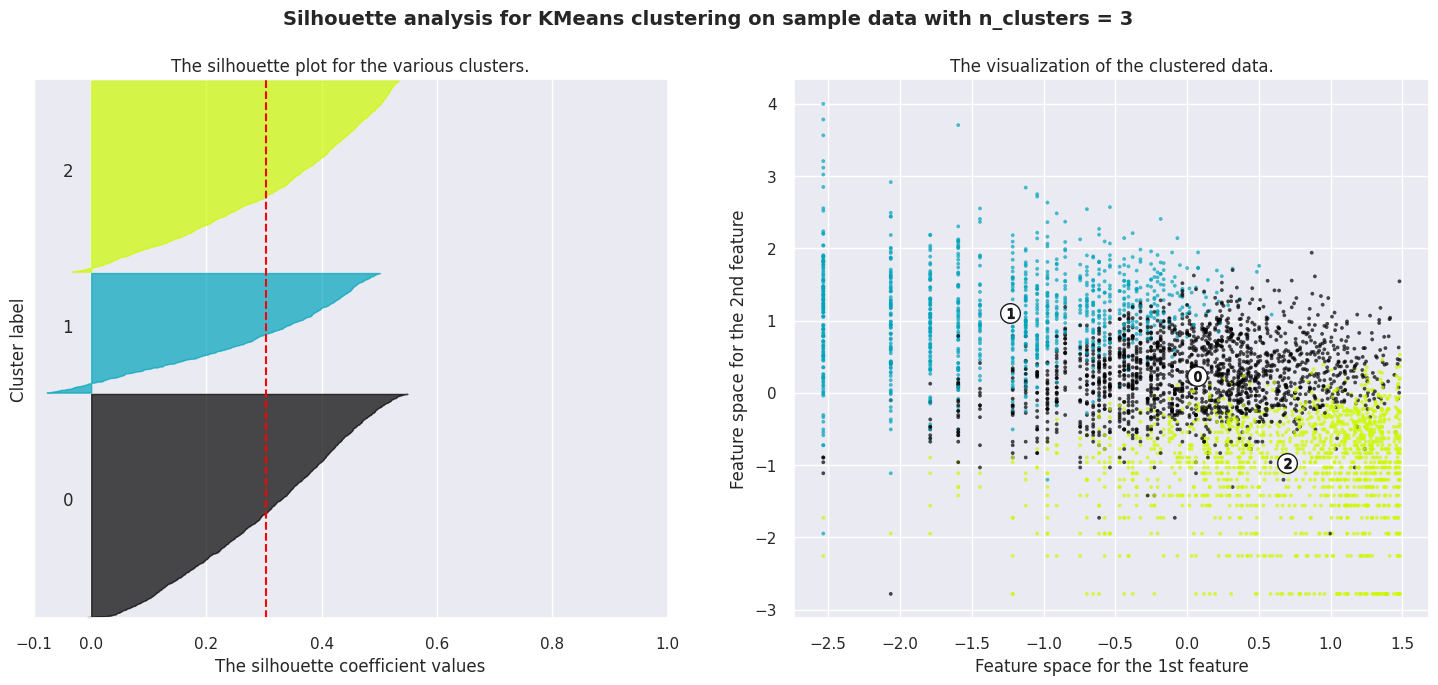

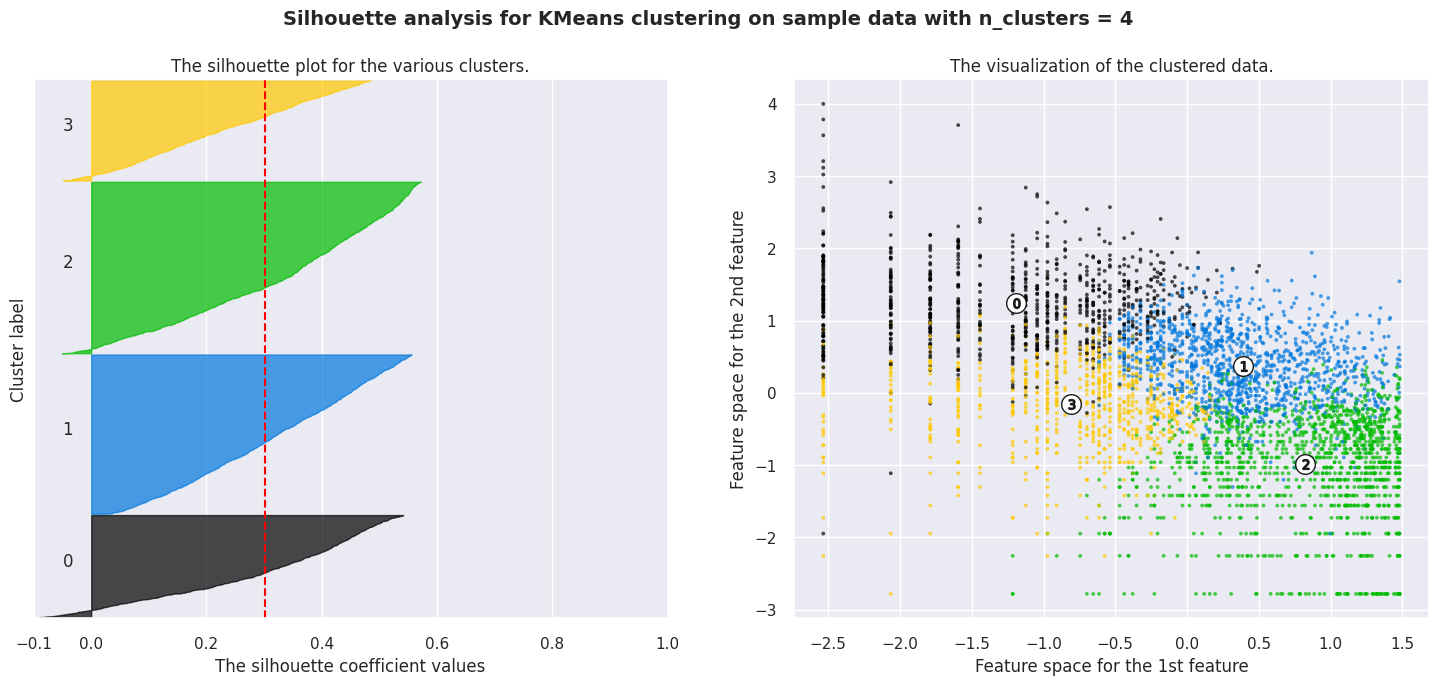

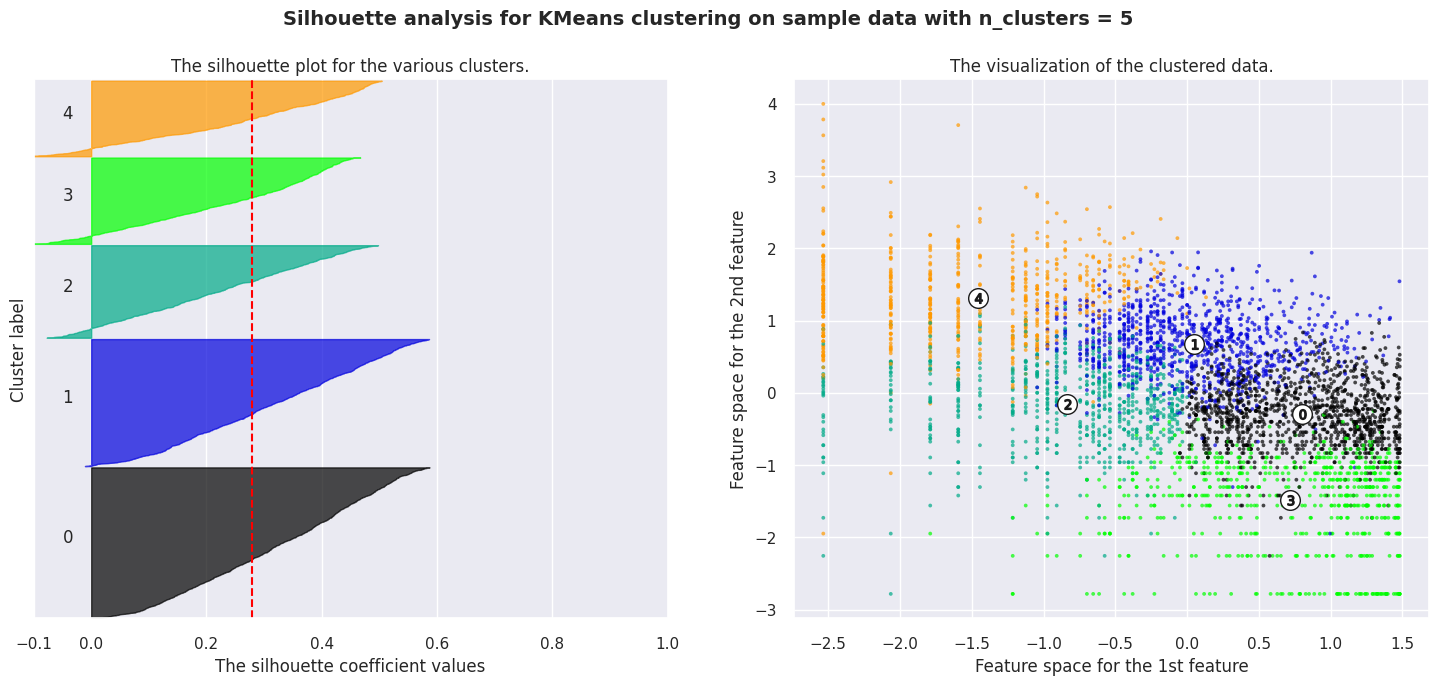

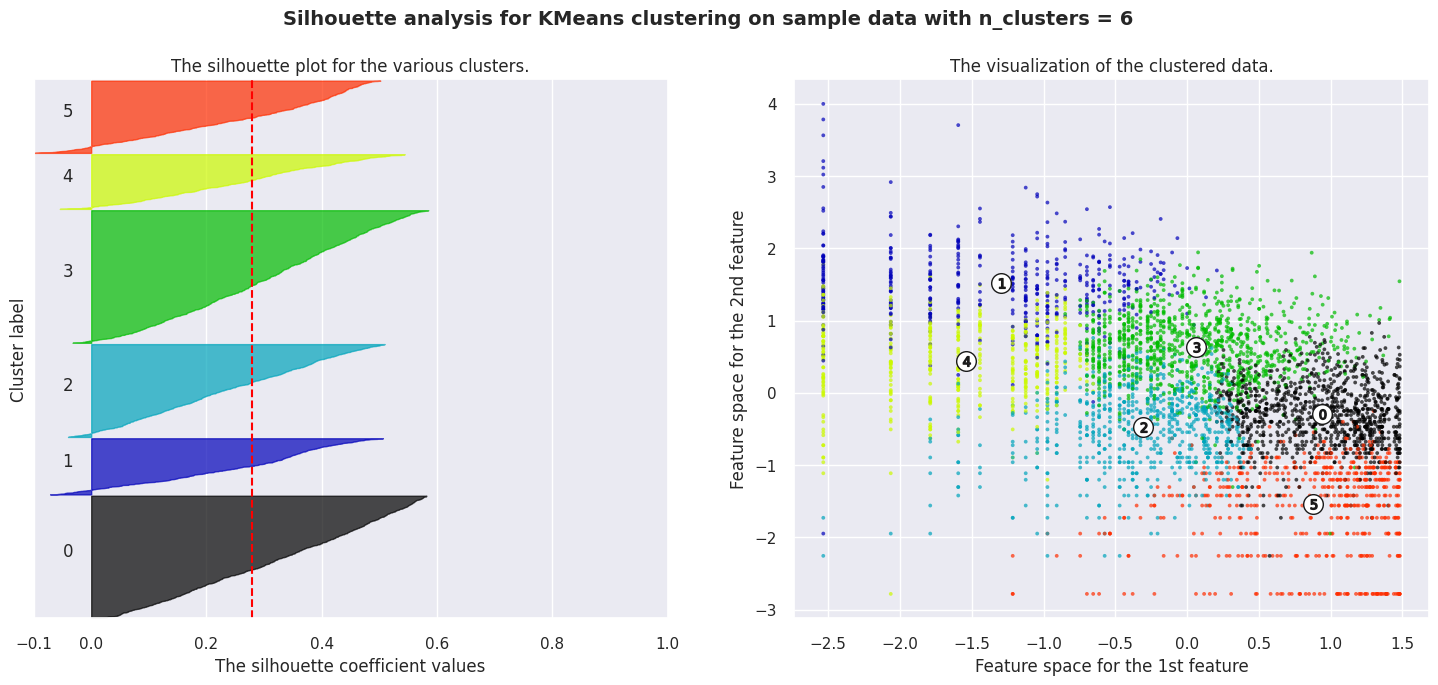

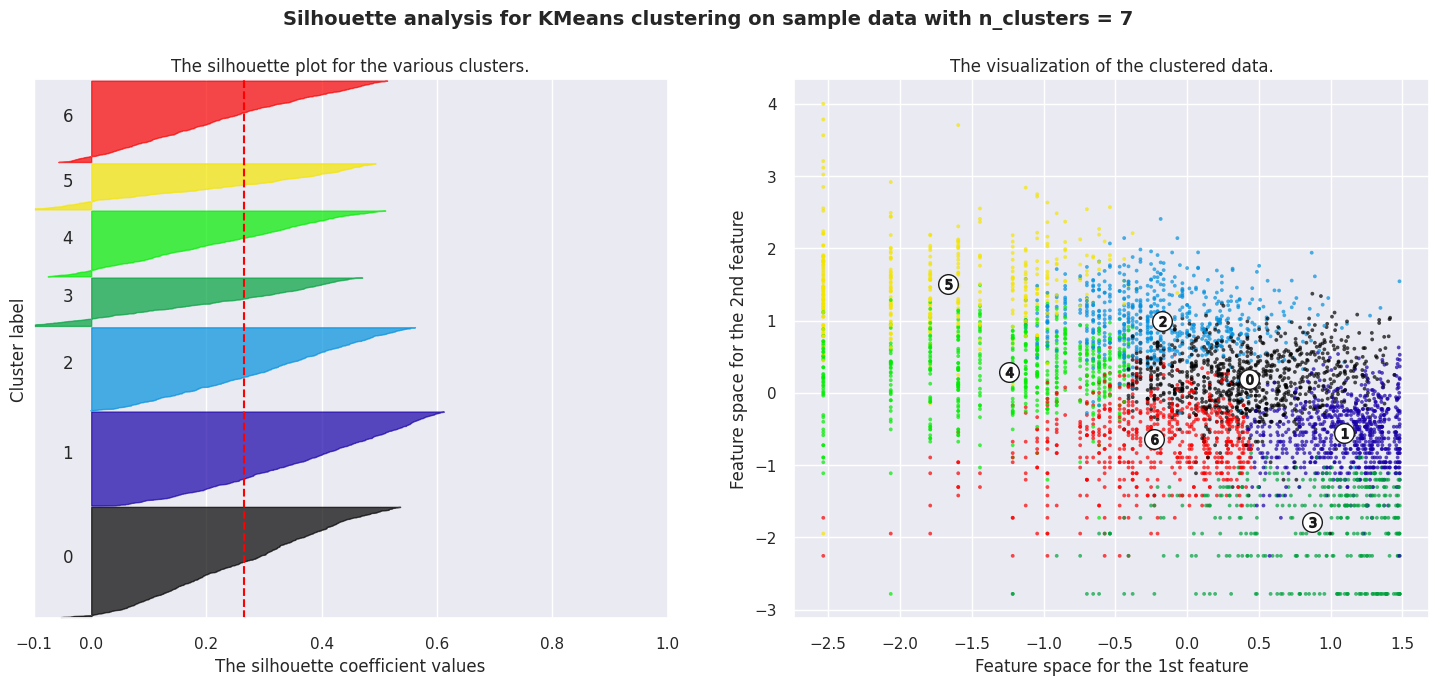

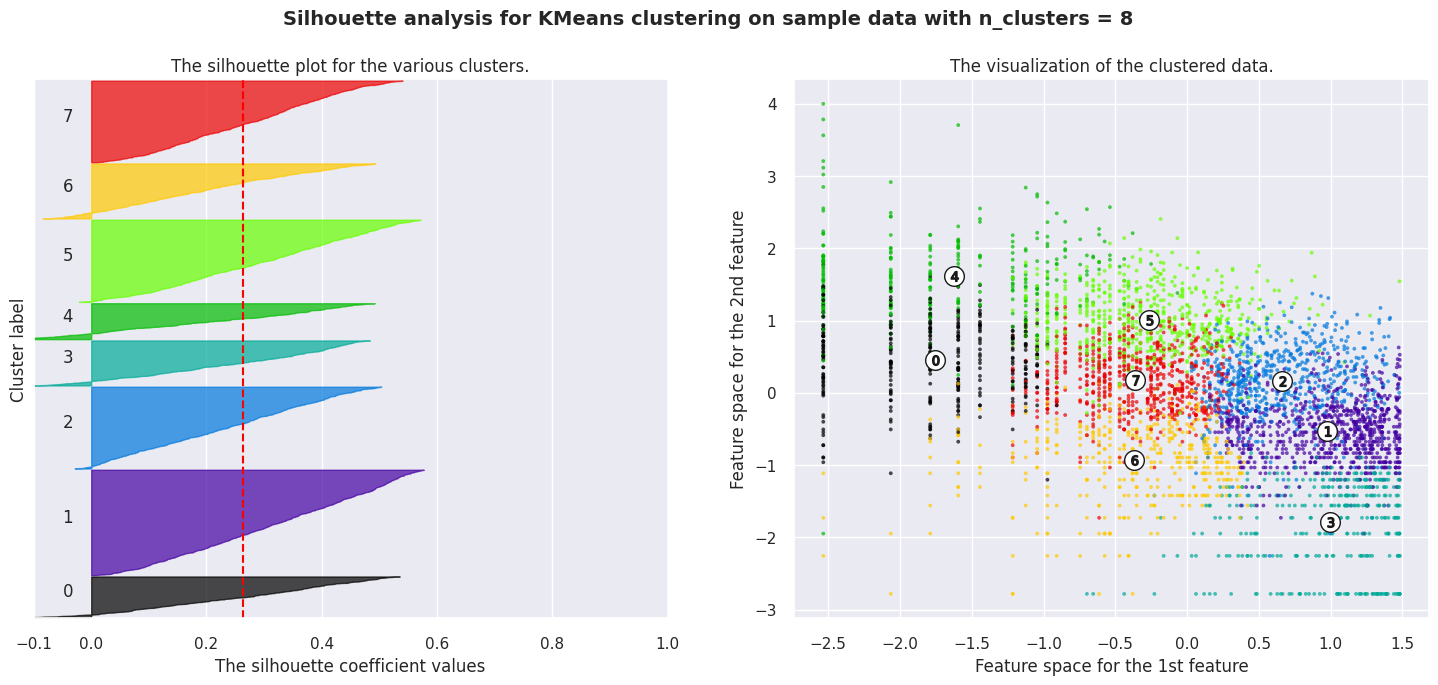

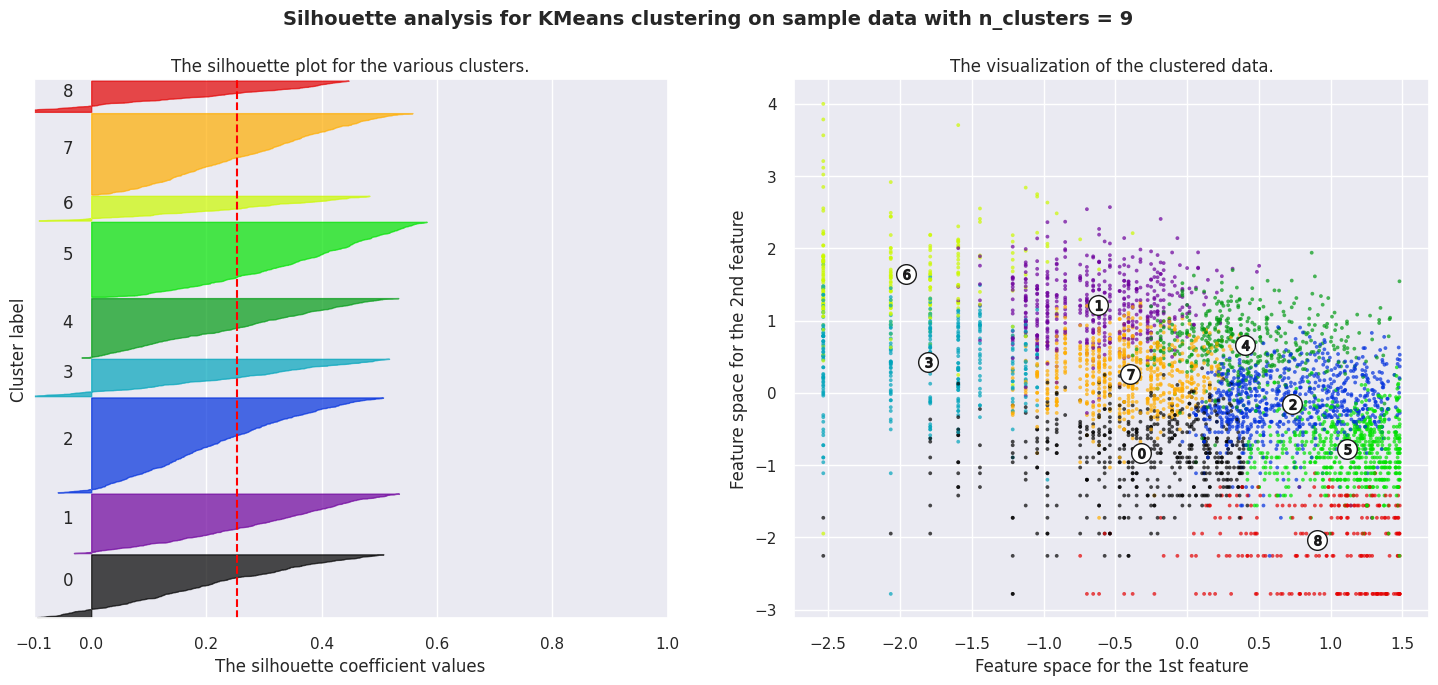

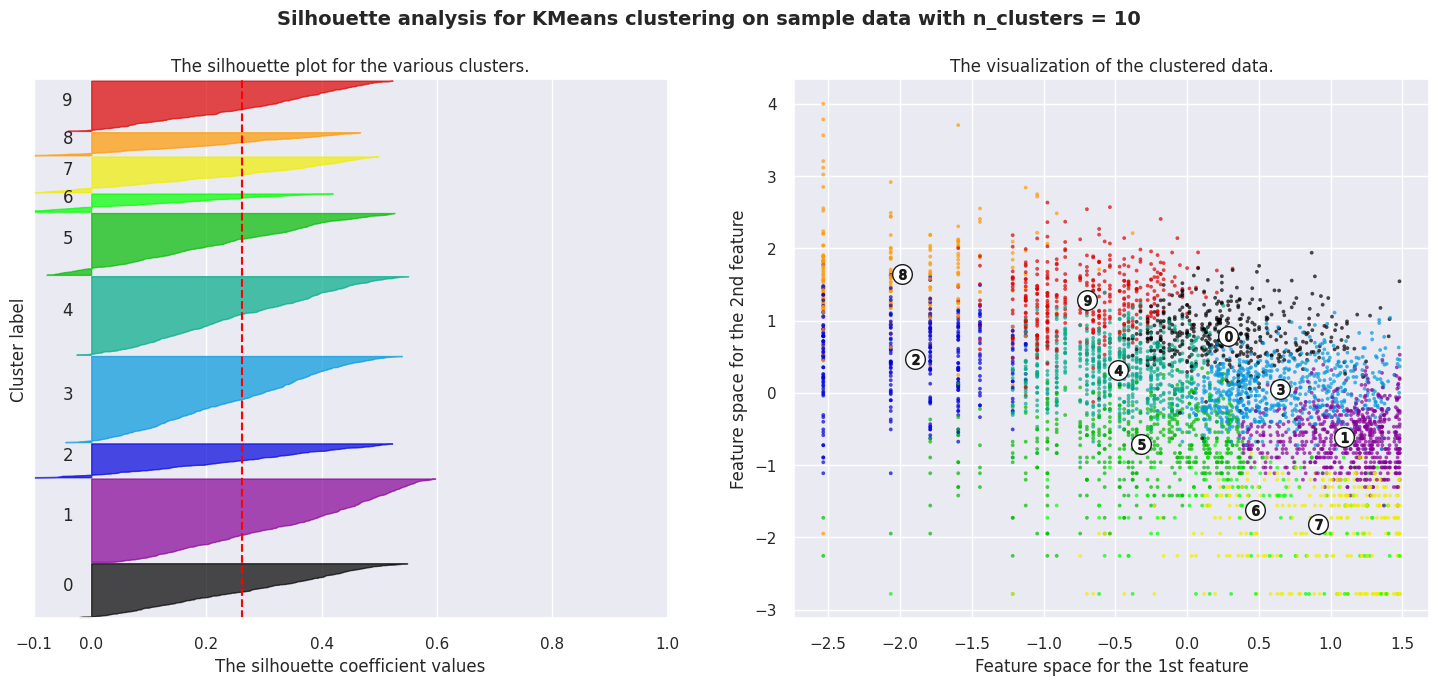

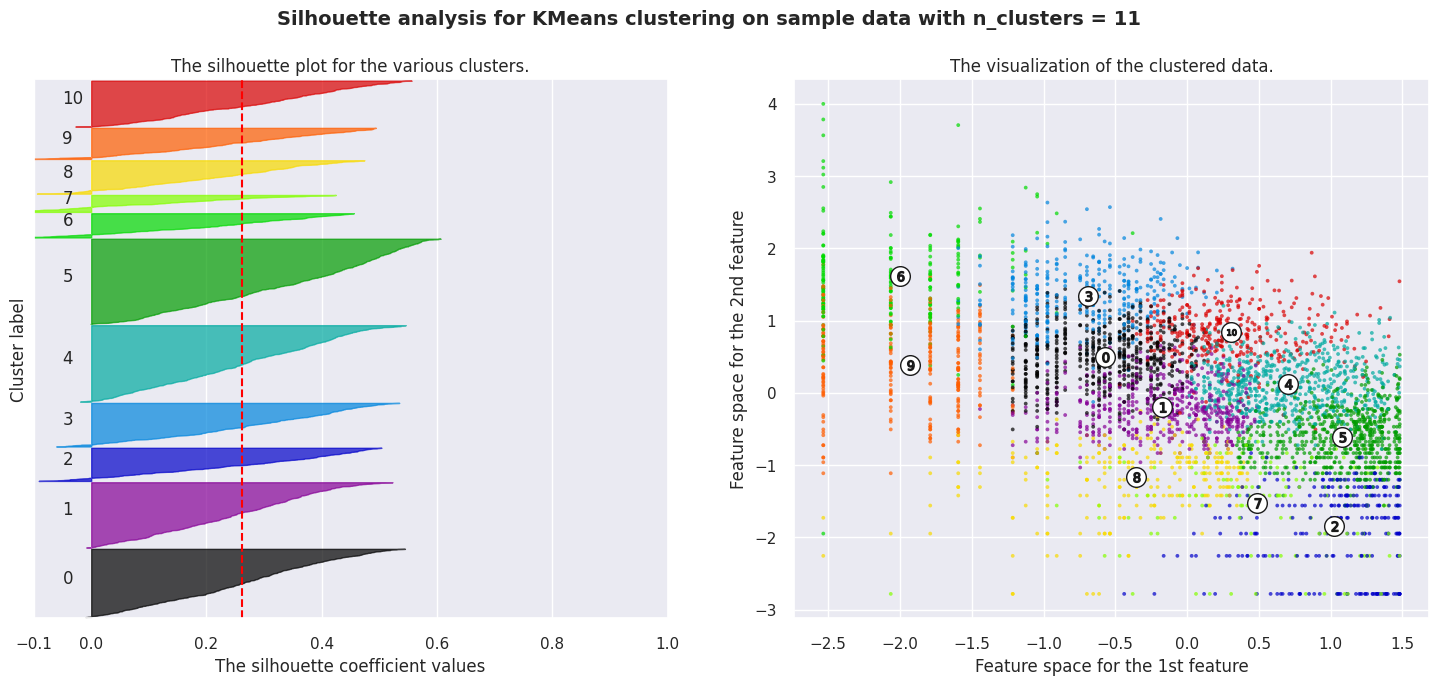

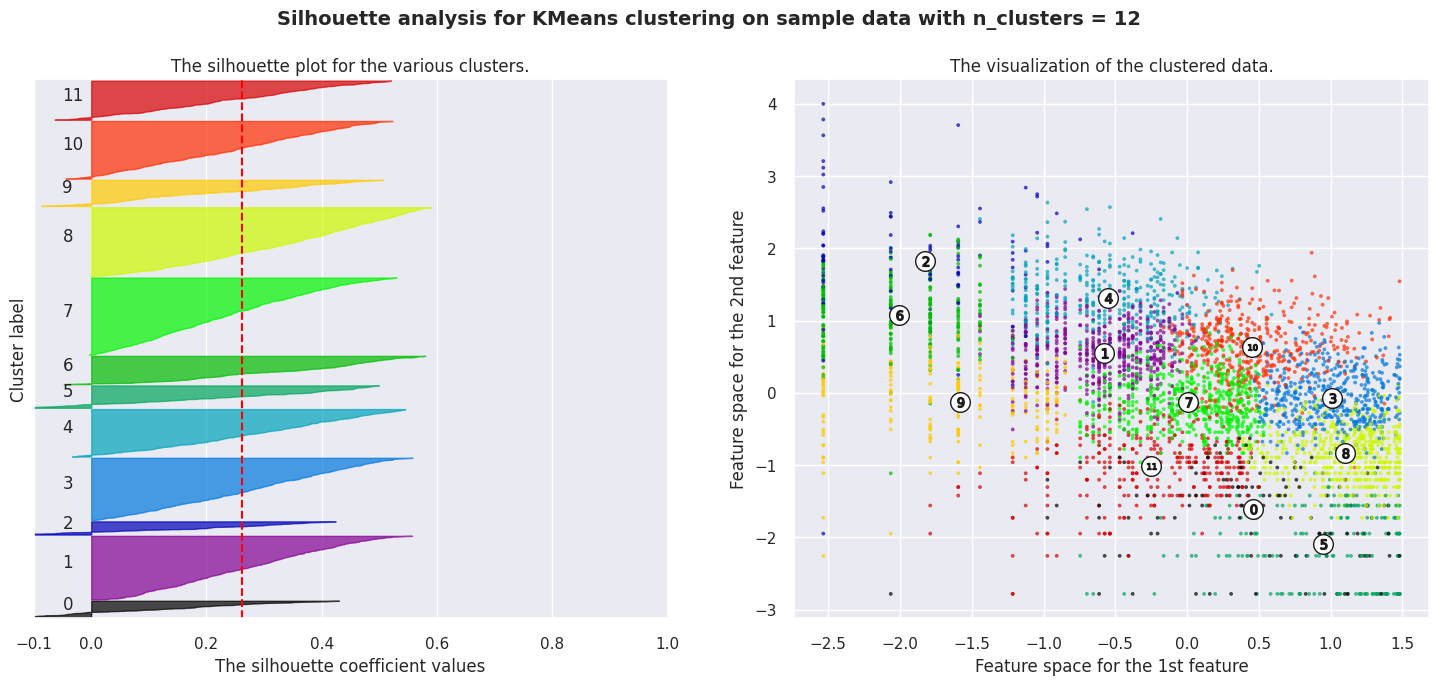

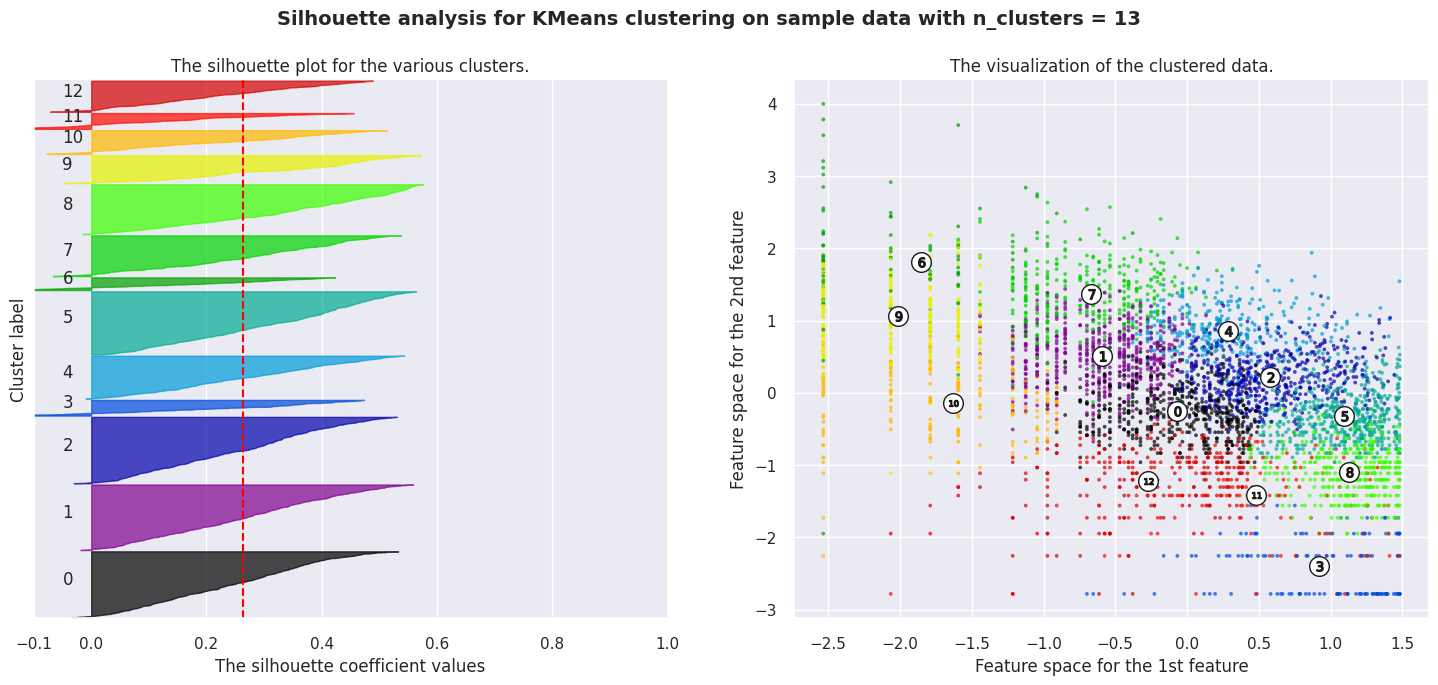

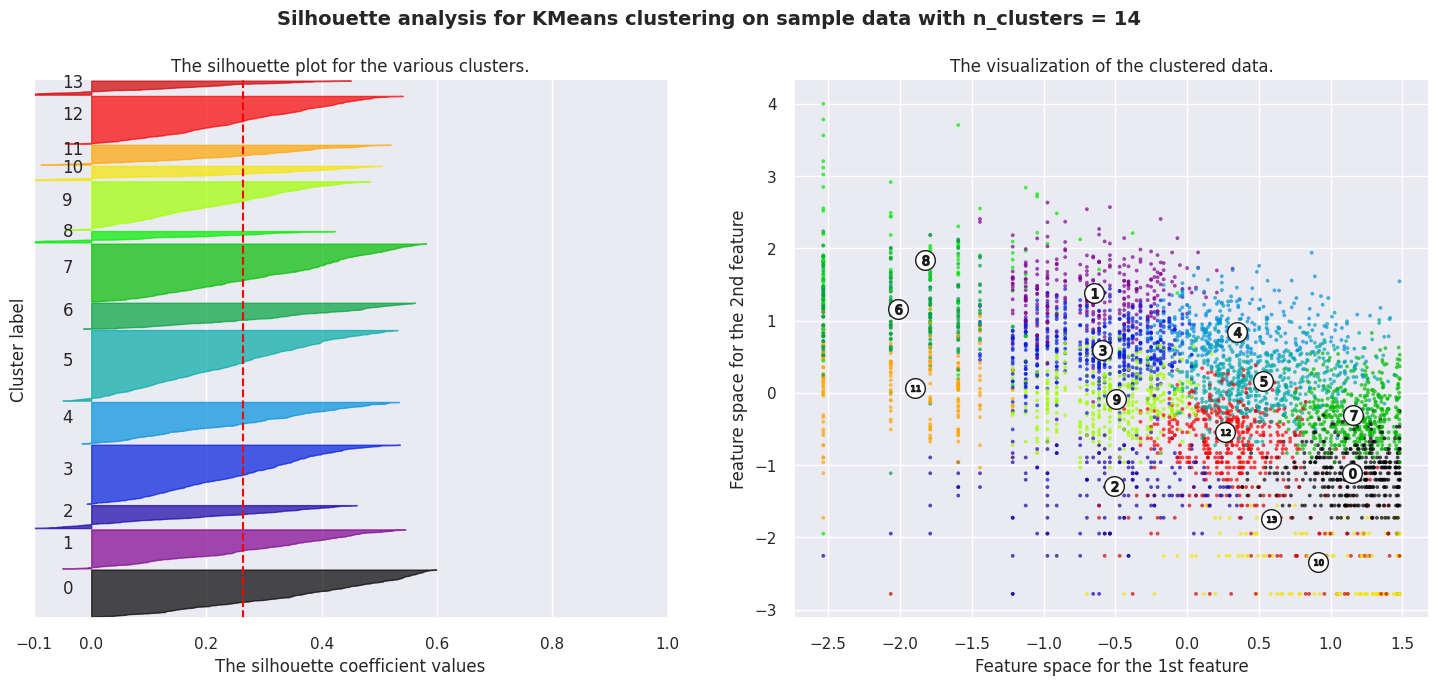

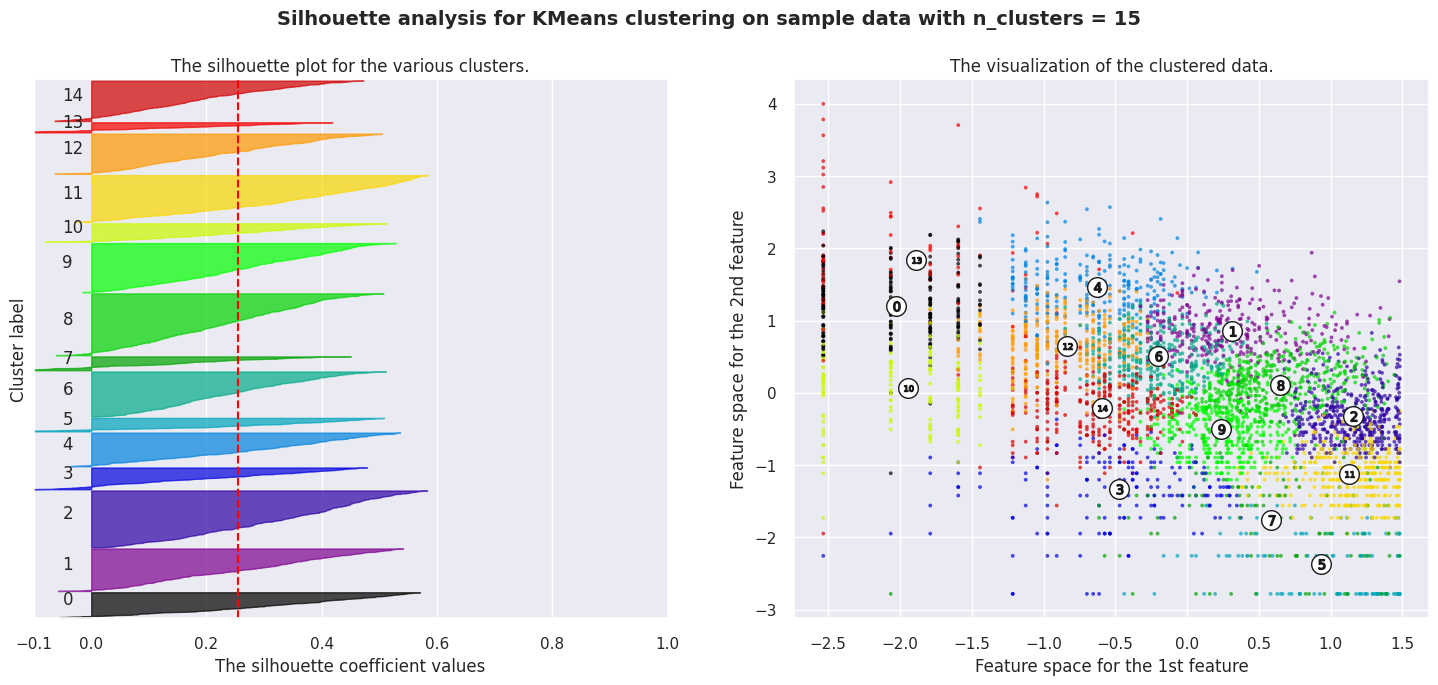

In [93]:
import matplotlib.cm as cm

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [98]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

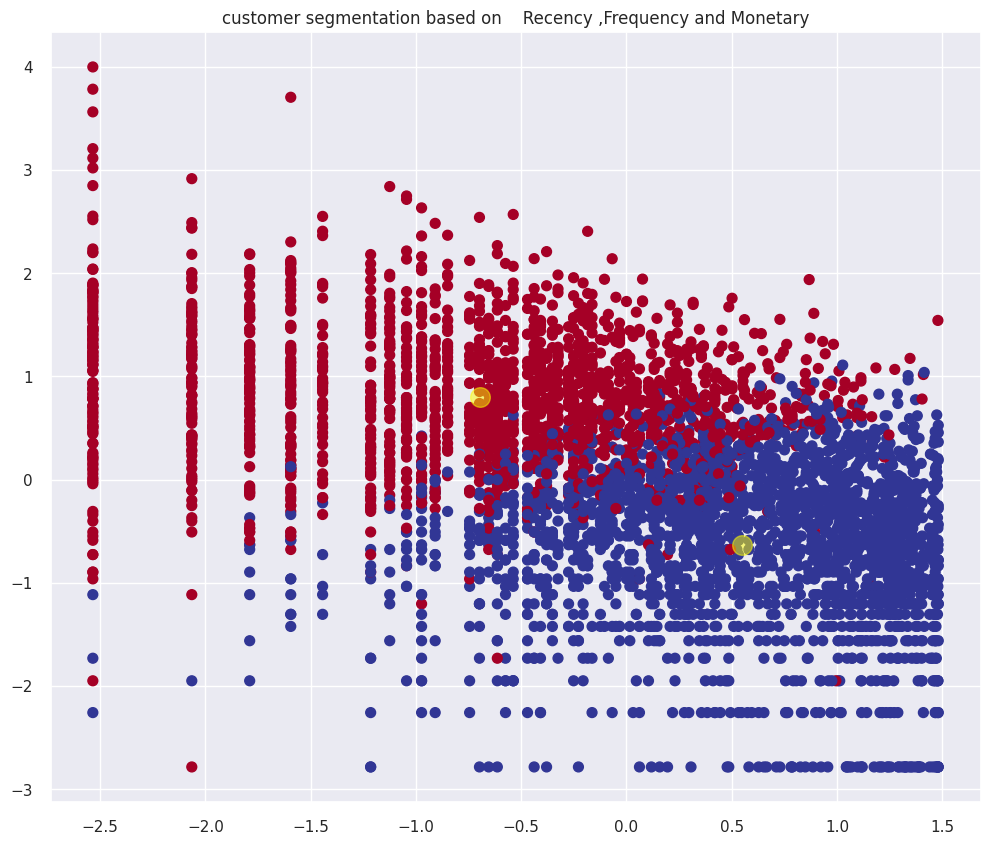

In [99]:
plt.figure(figsize=(12,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary

# Applying Elbow Method on Recency ,Frequency and Monetary

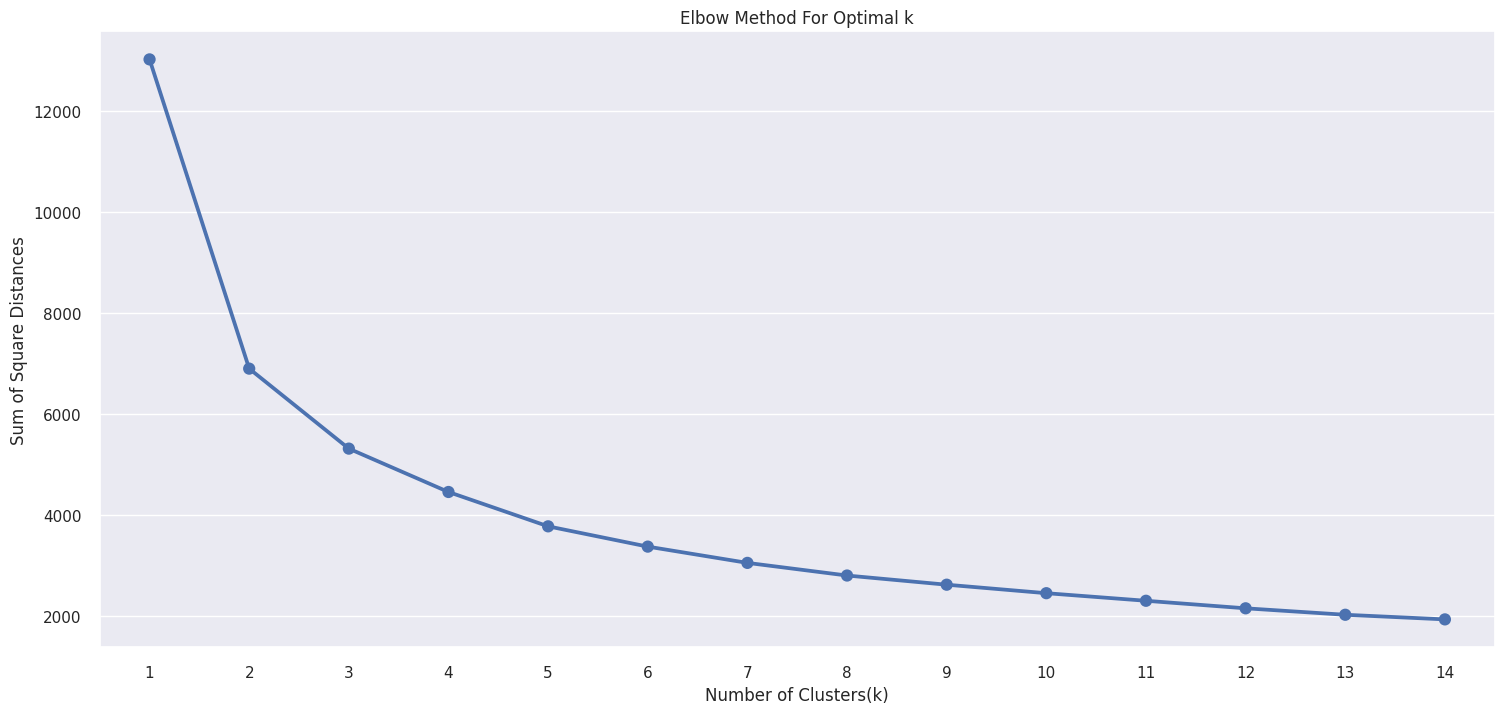

In [100]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [101]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        1  
12347.0        0.693147       5.204007      8.368693        0  
12348.0        4.317488       3.433987      7.494007        1  
12349.0        2.890372       4.290459      7.471676        0  
12350.0        5.736572       2.833213      5.812338        1  
12352.0        3.583519       4.442651      7.826459        0  
12353.0        5.318120       1.386294      4.488636        1  
12354.0        5.446737       4.060443      6.984161        1  
12355.0        5.365976       2.564949      6.129921        1  
12356.0        3.091042       4.077537      7.941449        0

# Dendogram to find the optimal number of clusters

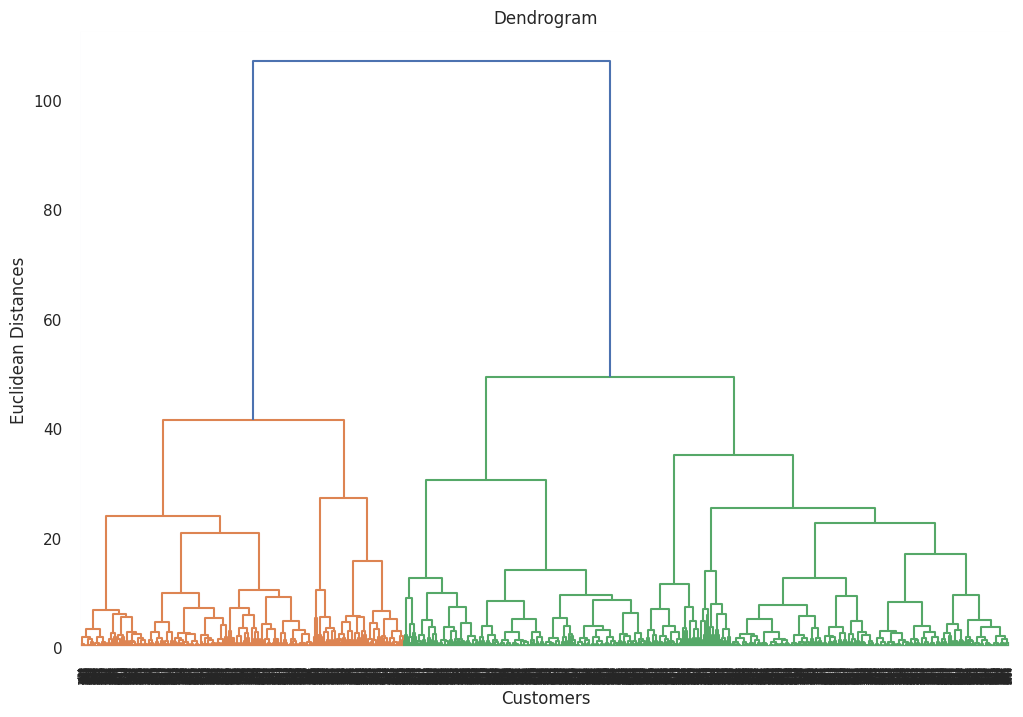

In [102]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90 No. of Cluster = 2

In [103]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

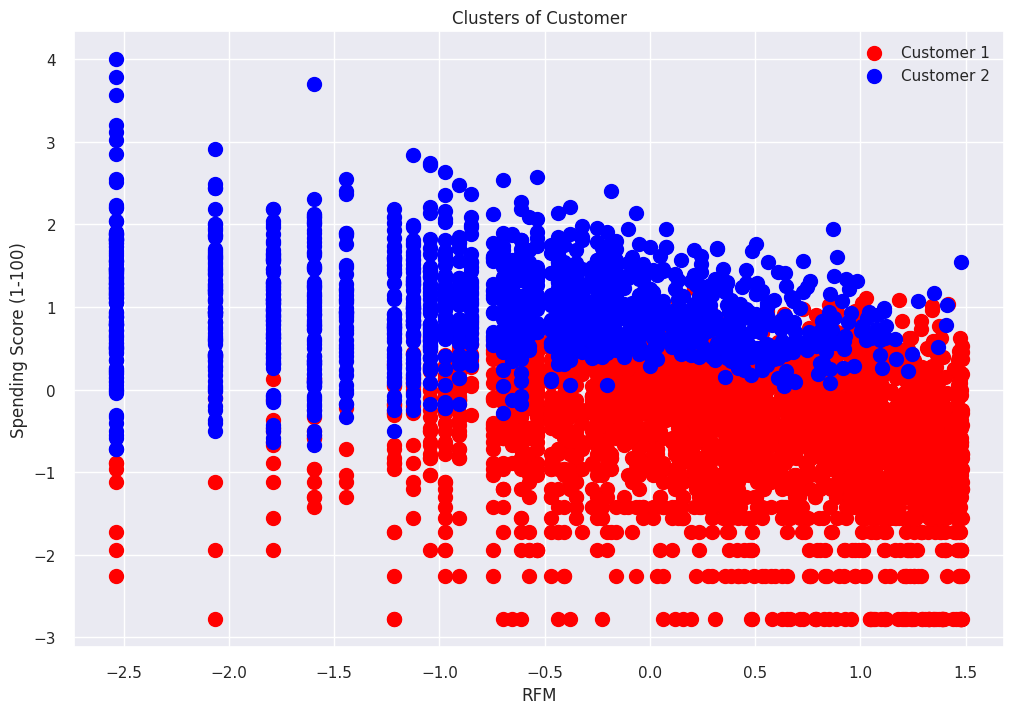

In [104]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(12,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')


plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 2

# Applying DBSCAN to Recency ,Frequency and Monetary

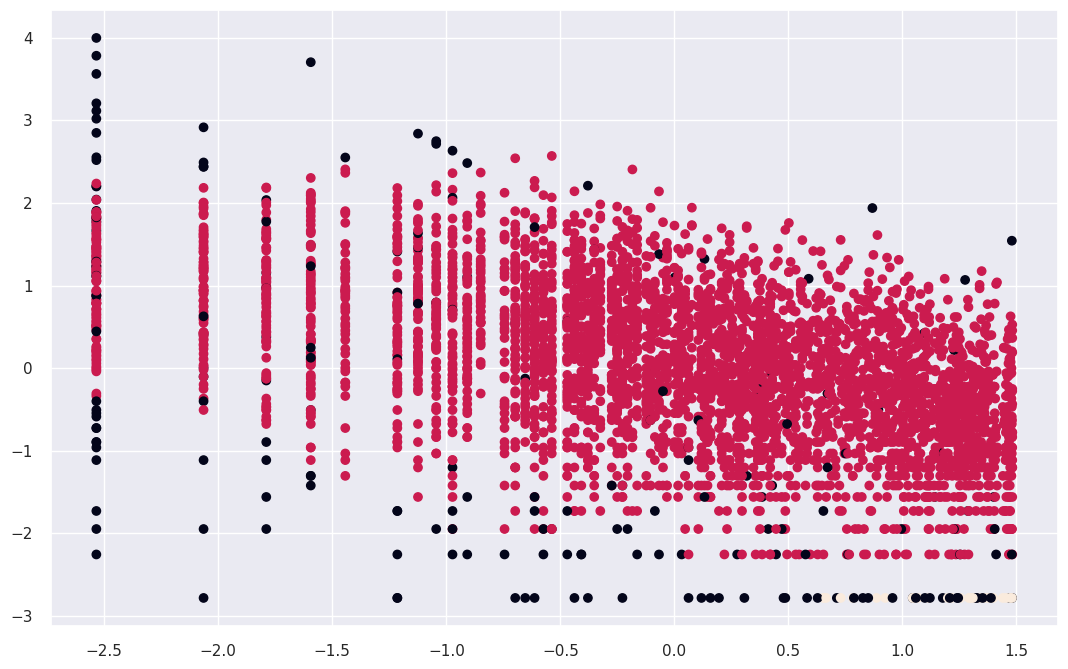

In [105]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3

# Summary

In [106]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"])
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"])
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"])
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  